<a href="https://colab.research.google.com/github/Pravallika1234uppala/ML/blob/main/ML%20Models/Supervised%20Learning/Regression%20Models/Ridge_lasso_elasticnet_CV/Ridge(L2_Regula)_Lasso(L1_Regula)_ElasticNet_CrossValidation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. DATA CLEANING:

In [4]:
#Dataset: Algerian Forest Fires Dataset.
#FWI - dependent feature for regression problem.
#classes - dependent feature for classification problem

In [5]:
#EDA
#FE
#Data cleaning
#Train Model
#hyperparameter for dataset.


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_csv("Algerianforest.csv")

In [8]:
df

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI   BUI  \
0     1     6  2012          29  57  18     0  65.7  3.4   7.6  1.3   3.4   
1     2     6  2012          29  61  13   1.3  64.4  4.1   7.6    1   3.9   
2     3     6  2012          26  82  22  13.1  47.1  2.5   7.1  0.3   2.7   
3     4     6  2012          25  89  13   2.5  28.6  1.3   6.9    0   1.7   
4     5     6  2012          27  77  16     0  64.8    3  14.2  1.2   3.9   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...   
242  26     9  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
243  27     9  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
244  28     9  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
245  29     9  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
246  30     9  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI     Classes    
0    0.5   not fire     
1    0.4   not fire     
2    0.1   not fire     
3      0   not fire     
4    0.5   not fire     
..   ...           ...  
242  6.5       fire     
243    0   not fire     
244  0.2   not fire     
245  0.7   not fire     
246  0.5  not fire      

[247 rows x 14 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [10]:
#make sure not only in objects convert to int or float if needed.

In [11]:
#Data cleaning
df.isnull()

day  month   year  Temperature     RH     Ws  Rain    FFMC    DMC  \
0    False  False  False        False  False  False  False  False  False   
1    False  False  False        False  False  False  False  False  False   
2    False  False  False        False  False  False  False  False  False   
3    False  False  False        False  False  False  False  False  False   
4    False  False  False        False  False  False  False  False  False   
..     ...    ...    ...          ...    ...    ...    ...    ...    ...   
242  False  False  False        False  False  False  False  False  False   
243  False  False  False        False  False  False  False  False  False   
244  False  False  False        False  False  False  False  False  False   
245  False  False  False        False  False  False  False  False  False   
246  False  False  False        False  False  False  False  False  False   

        DC    ISI    BUI    FWI  Classes    
0    False  False  False  False      False  
1    False  False  False  False      False  
2    False  False  False  False      False  
3    False  False  False  False      False  
4    False  False  False  False      False  
..     ...    ...    ...    ...        ...  
242  False  False  False  False      False  
243  False  False  False  False      False  
244  False  False  False  False      False  
245  False  False  False  False      False  
246  False  False  False  False      False  

[247 rows x 14 columns]

In [12]:
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [13]:
df.isnull().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
242    False
243    False
244    False
245    False
246    False
Length: 247, dtype: bool

In [14]:
#retrieving only if it missing values:
df[df.isnull().any(axis=1)]

day month  year Temperature   RH   Ws Rain   \
122                            NaN   NaN   NaN         NaN  NaN  NaN   NaN   
123  Sidi-Bel Abbes Region Dataset   NaN   NaN         NaN  NaN  NaN   NaN   
168                             14     7  2012          37   37   18   0.2   

     FFMC   DMC      DC   ISI   BUI      FWI Classes    
122   NaN   NaN     NaN   NaN   NaN      NaN       NaN  
123   NaN   NaN     NaN   NaN   NaN      NaN       NaN  
168  88.9  12.9  14.6 9  12.5  10.4  fire          NaN

In [15]:
#Dividing dataset into 2 grps
df.loc[:122, "Region"]=0
df.loc[122:, "Region"]=1

In [16]:
df

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI   BUI  \
0     1     6  2012          29  57  18     0  65.7  3.4   7.6  1.3   3.4   
1     2     6  2012          29  61  13   1.3  64.4  4.1   7.6    1   3.9   
2     3     6  2012          26  82  22  13.1  47.1  2.5   7.1  0.3   2.7   
3     4     6  2012          25  89  13   2.5  28.6  1.3   6.9    0   1.7   
4     5     6  2012          27  77  16     0  64.8    3  14.2  1.2   3.9   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...   
242  26     9  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
243  27     9  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
244  28     9  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
245  29     9  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
246  30     9  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI     Classes    Region  
0    0.5   not fire        0.0  
1    0.4   not fire        0.0  
2    0.1   not fire        0.0  
3      0   not fire        0.0  
4    0.5   not fire        0.0  
..   ...           ...     ...  
242  6.5       fire        1.0  
243    0   not fire        1.0  
244  0.2   not fire        1.0  
245  0.7   not fire        1.0  
246  0.5  not fire         1.0  

[247 rows x 15 columns]

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       247 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.1+ KB


In [18]:
#Region in float:
#To convert to int:
df["Region"] = df["Region"].astype(int)

In [19]:
df

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI   BUI  \
0     1     6  2012          29  57  18     0  65.7  3.4   7.6  1.3   3.4   
1     2     6  2012          29  61  13   1.3  64.4  4.1   7.6    1   3.9   
2     3     6  2012          26  82  22  13.1  47.1  2.5   7.1  0.3   2.7   
3     4     6  2012          25  89  13   2.5  28.6  1.3   6.9    0   1.7   
4     5     6  2012          27  77  16     0  64.8    3  14.2  1.2   3.9   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...   
242  26     9  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
243  27     9  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
244  28     9  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
245  29     9  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
246  30     9  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI     Classes    Region  
0    0.5   not fire          0  
1    0.4   not fire          0  
2    0.1   not fire          0  
3      0   not fire          0  
4    0.5   not fire          0  
..   ...           ...     ...  
242  6.5       fire          1  
243    0   not fire          1  
244  0.2   not fire          1  
245  0.7   not fire          1  
246  0.5  not fire           1  

[247 rows x 15 columns]

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       247 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 29.1+ KB


In [21]:
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
Region         0
dtype: int64

In [22]:
df[df.isnull().any(axis=1)]

day month  year Temperature   RH   Ws Rain   \
122                            NaN   NaN   NaN         NaN  NaN  NaN   NaN   
123  Sidi-Bel Abbes Region Dataset   NaN   NaN         NaN  NaN  NaN   NaN   
168                             14     7  2012          37   37   18   0.2   

     FFMC   DMC      DC   ISI   BUI      FWI Classes    Region  
122   NaN   NaN     NaN   NaN   NaN      NaN       NaN       1  
123   NaN   NaN     NaN   NaN   NaN      NaN       NaN       1  
168  88.9  12.9  14.6 9  12.5  10.4  fire          NaN       1

<Axes: >

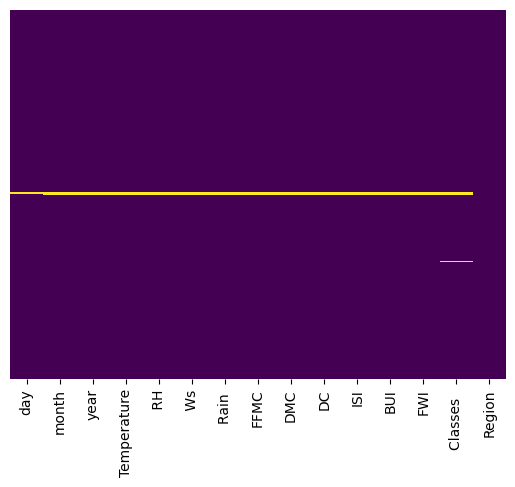

In [23]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [24]:
df = df.drop([122,123],axis=0).reset_index(drop=True)

In [25]:
#remove the null values:
#df=df.dropna().reset_index(drop=True)
#reset_index will remove gaps and re arrange index values.

In [26]:
df

day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI   BUI  \
0     1     6  2012          29  57  18     0  65.7  3.4   7.6  1.3   3.4   
1     2     6  2012          29  61  13   1.3  64.4  4.1   7.6    1   3.9   
2     3     6  2012          26  82  22  13.1  47.1  2.5   7.1  0.3   2.7   
3     4     6  2012          25  89  13   2.5  28.6  1.3   6.9    0   1.7   
4     5     6  2012          27  77  16     0  64.8    3  14.2  1.2   3.9   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...   
240  26     9  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
241  27     9  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
242  28     9  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
243  29     9  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
244  30     9  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI     Classes    Region  
0    0.5   not fire          0  
1    0.4   not fire          0  
2    0.1   not fire          0  
3      0   not fire          0  
4    0.5   not fire          0  
..   ...           ...     ...  
240  6.5       fire          1  
241    0   not fire          1  
242  0.2   not fire          1  
243  0.7   not fire          1  
244  0.5  not fire           1  

[245 rows x 15 columns]

<Axes: >

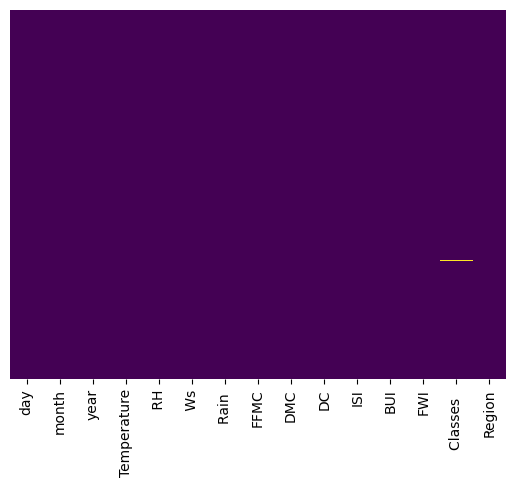

In [27]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [28]:
df.columns = ["day","month","year", "Temp", "rh", "ws", "rain", "ffmc", "dmc", "dc", "isi", "bui", "fwi", "class", "reg"]

In [29]:
df

day month  year Temp  rh  ws  rain  ffmc  dmc    dc  isi   bui  fwi  \
0     1     6  2012   29  57  18     0  65.7  3.4   7.6  1.3   3.4  0.5   
1     2     6  2012   29  61  13   1.3  64.4  4.1   7.6    1   3.9  0.4   
2     3     6  2012   26  82  22  13.1  47.1  2.5   7.1  0.3   2.7  0.1   
3     4     6  2012   25  89  13   2.5  28.6  1.3   6.9    0   1.7    0   
4     5     6  2012   27  77  16     0  64.8    3  14.2  1.2   3.9  0.5   
..   ..   ...   ...  ...  ..  ..   ...   ...  ...   ...  ...   ...  ...   
240  26     9  2012   30  65  14     0  85.4   16  44.5  4.5  16.9  6.5   
241  27     9  2012   28  87  15   4.4  41.1  6.5     8  0.1   6.2    0   
242  28     9  2012   27  87  29   0.5  45.9  3.5   7.9  0.4   3.4  0.2   
243  29     9  2012   24  54  18   0.1  79.7  4.3  15.2  1.7   5.1  0.7   
244  30     9  2012   24  64  15   0.2  67.3  3.8  16.5  1.2   4.8  0.5   

            class  reg  
0     not fire       0  
1     not fire       0  
2     not fire       0  
3     not fire       0  
4     not fire       0  
..            ...  ...  
240       fire       1  
241   not fire       1  
242   not fire       1  
243   not fire       1  
244  not fire        1  

[245 rows x 15 columns]

In [30]:
df[df.isnull().any(axis=1)]

day month  year Temp  rh  ws rain  ffmc   dmc      dc   isi   bui  \
166  14     7  2012   37  37  18  0.2  88.9  12.9  14.6 9  12.5  10.4   

         fwi class  reg  
166  fire      NaN    1

In [31]:
df.loc[166,'class']='not fire'

In [32]:
df[df.isnull().any(axis=1)]

Empty DataFrame
Columns: [day, month, year, Temp, rh, ws, rain, ffmc, dmc, dc, isi, bui, fwi, class, reg]
Index: []

<Axes: >

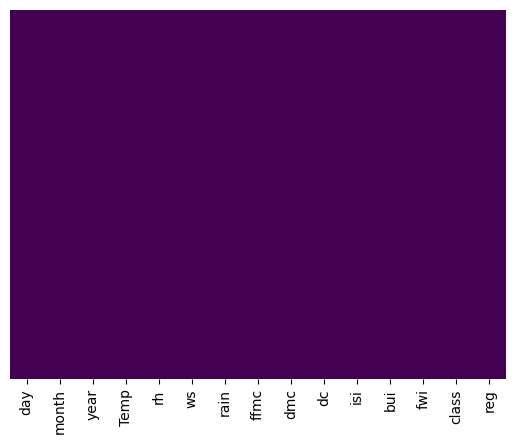

In [33]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [34]:
df.loc[122,:]

day              day
month          month
year            year
Temp     Temperature
rh                RH
ws                Ws
rain           Rain 
ffmc            FFMC
dmc              DMC
dc                DC
isi              ISI
bui              BUI
fwi              FWI
class      Classes  
reg                1
Name: 122, dtype: object

In [35]:
df = df.drop([122],axis=0).reset_index(drop=True)

In [36]:
df

day month  year Temp  rh  ws  rain  ffmc  dmc    dc  isi   bui  fwi  \
0     1     6  2012   29  57  18     0  65.7  3.4   7.6  1.3   3.4  0.5   
1     2     6  2012   29  61  13   1.3  64.4  4.1   7.6    1   3.9  0.4   
2     3     6  2012   26  82  22  13.1  47.1  2.5   7.1  0.3   2.7  0.1   
3     4     6  2012   25  89  13   2.5  28.6  1.3   6.9    0   1.7    0   
4     5     6  2012   27  77  16     0  64.8    3  14.2  1.2   3.9  0.5   
..   ..   ...   ...  ...  ..  ..   ...   ...  ...   ...  ...   ...  ...   
239  26     9  2012   30  65  14     0  85.4   16  44.5  4.5  16.9  6.5   
240  27     9  2012   28  87  15   4.4  41.1  6.5     8  0.1   6.2    0   
241  28     9  2012   27  87  29   0.5  45.9  3.5   7.9  0.4   3.4  0.2   
242  29     9  2012   24  54  18   0.1  79.7  4.3  15.2  1.7   5.1  0.7   
243  30     9  2012   24  64  15   0.2  67.3  3.8  16.5  1.2   4.8  0.5   

            class  reg  
0     not fire       0  
1     not fire       0  
2     not fire       0  
3     not fire       0  
4     not fire       0  
..            ...  ...  
239       fire       1  
240   not fire       1  
241   not fire       1  
242   not fire       1  
243  not fire        1  

[244 rows x 15 columns]

In [37]:
#to fix spaces in column names:
df.columns


Index(['day', 'month', 'year', 'Temp', 'rh', 'ws', 'rain', 'ffmc', 'dmc', 'dc',
       'isi', 'bui', 'fwi', 'class', 'reg'],
      dtype='object')

In [38]:
df.columns=df.columns.str.strip() #find whitespaces and update it
df.columns

Index(['day', 'month', 'year', 'Temp', 'rh', 'ws', 'rain', 'ffmc', 'dmc', 'dc',
       'isi', 'bui', 'fwi', 'class', 'reg'],
      dtype='object')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   day     244 non-null    object
 1   month   244 non-null    object
 2   year    244 non-null    object
 3   Temp    244 non-null    object
 4   rh      244 non-null    object
 5   ws      244 non-null    object
 6   rain    244 non-null    object
 7   ffmc    244 non-null    object
 8   dmc     244 non-null    object
 9   dc      244 non-null    object
 10  isi     244 non-null    object
 11  bui     244 non-null    object
 12  fwi     244 non-null    object
 13  class   244 non-null    object
 14  reg     244 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.7+ KB


In [40]:
#values from temperatiure till fwi should be float.
#take values that needs to be integer

df[['day', 'month', 'year', 'Temp', 'rh', 'ws']]=df[['day', 'month', 'year', 'Temp', 'rh', 'ws']].astype(int)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   day     244 non-null    int64 
 1   month   244 non-null    int64 
 2   year    244 non-null    int64 
 3   Temp    244 non-null    int64 
 4   rh      244 non-null    int64 
 5   ws      244 non-null    int64 
 6   rain    244 non-null    object
 7   ffmc    244 non-null    object
 8   dmc     244 non-null    object
 9   dc      244 non-null    object
 10  isi     244 non-null    object
 11  bui     244 non-null    object
 12  fwi     244 non-null    object
 13  class   244 non-null    object
 14  reg     244 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.7+ KB


In [42]:
df

day  month  year  Temp  rh  ws  rain  ffmc  dmc    dc  isi   bui  fwi  \
0      1      6  2012    29  57  18     0  65.7  3.4   7.6  1.3   3.4  0.5   
1      2      6  2012    29  61  13   1.3  64.4  4.1   7.6    1   3.9  0.4   
2      3      6  2012    26  82  22  13.1  47.1  2.5   7.1  0.3   2.7  0.1   
3      4      6  2012    25  89  13   2.5  28.6  1.3   6.9    0   1.7    0   
4      5      6  2012    27  77  16     0  64.8    3  14.2  1.2   3.9  0.5   
..   ...    ...   ...   ...  ..  ..   ...   ...  ...   ...  ...   ...  ...   
239   26      9  2012    30  65  14     0  85.4   16  44.5  4.5  16.9  6.5   
240   27      9  2012    28  87  15   4.4  41.1  6.5     8  0.1   6.2    0   
241   28      9  2012    27  87  29   0.5  45.9  3.5   7.9  0.4   3.4  0.2   
242   29      9  2012    24  54  18   0.1  79.7  4.3  15.2  1.7   5.1  0.7   
243   30      9  2012    24  64  15   0.2  67.3  3.8  16.5  1.2   4.8  0.5   

            class  reg  
0     not fire       0  
1     not fire       0  
2     not fire       0  
3     not fire       0  
4     not fire       0  
..            ...  ...  
239       fire       1  
240   not fire       1  
241   not fire       1  
242   not fire       1  
243  not fire        1  

[244 rows x 15 columns]

In [43]:
#changing other columns to float:
#df.iloc[:,6:13]=df.iloc[:,6:13].astype(float)

In [44]:
objects=[features for features in df.columns if df[features].dtypes=='O']

In [45]:
objects

['rain', 'ffmc', 'dmc', 'dc', 'isi', 'bui', 'fwi', 'class']

In [46]:
df.loc[165,]

day            14
month           7
year         2012
Temp           37
rh             37
ws             18
rain          0.2
ffmc         88.9
dmc          12.9
dc         14.6 9
isi          12.5
bui          10.4
fwi       fire   
class    not fire
reg             1
Name: 165, dtype: object

In [47]:
df.loc[165,'dc']='14.69'
df.loc[165,'fwi']='4.5'

In [48]:
df.loc[165,]

day            14
month           7
year         2012
Temp           37
rh             37
ws             18
rain          0.2
ffmc         88.9
dmc          12.9
dc          14.69
isi          12.5
bui          10.4
fwi           4.5
class    not fire
reg             1
Name: 165, dtype: object

In [49]:
for i in objects:
    if i!= 'class':
      df[i] = df[i].astype(float)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     244 non-null    int64  
 1   month   244 non-null    int64  
 2   year    244 non-null    int64  
 3   Temp    244 non-null    int64  
 4   rh      244 non-null    int64  
 5   ws      244 non-null    int64  
 6   rain    244 non-null    float64
 7   ffmc    244 non-null    float64
 8   dmc     244 non-null    float64
 9   dc      244 non-null    float64
 10  isi     244 non-null    float64
 11  bui     244 non-null    float64
 12  fwi     244 non-null    float64
 13  class   244 non-null    object 
 14  reg     244 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.7+ KB


In [51]:
df.describe()

day       month    year        Temp          rh          ws  \
count  244.000000  244.000000   244.0  244.000000  244.000000  244.000000   
mean    15.754098    7.500000  2012.0   32.172131   61.938525   15.504098   
std      8.825059    1.112961     0.0    3.633843   14.884200    2.810178   
min      1.000000    6.000000  2012.0   22.000000   21.000000    6.000000   
25%      8.000000    7.000000  2012.0   30.000000   52.000000   14.000000   
50%     16.000000    7.500000  2012.0   32.000000   63.000000   15.000000   
75%     23.000000    8.000000  2012.0   35.000000   73.250000   17.000000   
max     31.000000    9.000000  2012.0   42.000000   90.000000   29.000000   

             rain        ffmc         dmc          dc         isi         bui  \
count  244.000000  244.000000  244.000000  244.000000  244.000000  244.000000   
mean     0.760656   77.887705   14.673361   49.288484    4.774180   16.664754   
std      1.999406   14.337571   12.368039   47.619393    4.175318   14.204824   
min      0.000000   28.600000    0.700000    6.900000    0.000000    1.100000   
25%      0.000000   72.075000    5.800000   13.275000    1.400000    6.000000   
50%      0.000000   83.500000   11.300000   33.100000    3.500000   12.250000   
75%      0.500000   88.300000   20.750000   68.150000    7.300000   22.525000   
max     16.800000   96.000000   65.900000  220.400000   19.000000   68.000000   

              fwi         reg  
count  244.000000  244.000000  
mean     7.025000    0.500000  
std      7.427016    0.501028  
min      0.000000    0.000000  
25%      0.700000    0.000000  
50%      4.350000    0.500000  
75%     11.375000    1.000000  
max     31.100000    1.000000

In [52]:
#convert cleaned dataset inot csv:
df.to_csv('AlgerianForestFireCleaned.csv', index=False)

## 2. EDA:

In [53]:
df.head()

day  month  year  Temp  rh  ws  rain  ffmc  dmc    dc  isi  bui  fwi  \
0    1      6  2012    29  57  18   0.0  65.7  3.4   7.6  1.3  3.4  0.5   
1    2      6  2012    29  61  13   1.3  64.4  4.1   7.6  1.0  3.9  0.4   
2    3      6  2012    26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1   
3    4      6  2012    25  89  13   2.5  28.6  1.3   6.9  0.0  1.7  0.0   
4    5      6  2012    27  77  16   0.0  64.8  3.0  14.2  1.2  3.9  0.5   

         class  reg  
0  not fire       0  
1  not fire       0  
2  not fire       0  
3  not fire       0  
4  not fire       0

In [54]:
dfead=df

In [55]:
#remove unimportant features:
dfead=dfead.drop(['day', 'month', 'year'], axis=1)

In [56]:
dfead

Temp  rh  ws  rain  ffmc   dmc    dc  isi   bui  fwi         class  reg
0      29  57  18   0.0  65.7   3.4   7.6  1.3   3.4  0.5   not fire       0
1      29  61  13   1.3  64.4   4.1   7.6  1.0   3.9  0.4   not fire       0
2      26  82  22  13.1  47.1   2.5   7.1  0.3   2.7  0.1   not fire       0
3      25  89  13   2.5  28.6   1.3   6.9  0.0   1.7  0.0   not fire       0
4      27  77  16   0.0  64.8   3.0  14.2  1.2   3.9  0.5   not fire       0
..    ...  ..  ..   ...   ...   ...   ...  ...   ...  ...           ...  ...
239    30  65  14   0.0  85.4  16.0  44.5  4.5  16.9  6.5       fire       1
240    28  87  15   4.4  41.1   6.5   8.0  0.1   6.2  0.0   not fire       1
241    27  87  29   0.5  45.9   3.5   7.9  0.4   3.4  0.2   not fire       1
242    24  54  18   0.1  79.7   4.3  15.2  1.7   5.1  0.7   not fire       1
243    24  64  15   0.2  67.3   3.8  16.5  1.2   4.8  0.5  not fire        1

[244 rows x 12 columns]

In [57]:
#encoding of categories in class:
#dfead['class']=np.where(dfead['class']=='not fire',0,1)
dfead['class']=np.where(dfead['class'].str.contains('not fire'),0,1)

In [58]:
dfead

Temp  rh  ws  rain  ffmc   dmc    dc  isi   bui  fwi  class  reg
0      29  57  18   0.0  65.7   3.4   7.6  1.3   3.4  0.5      0    0
1      29  61  13   1.3  64.4   4.1   7.6  1.0   3.9  0.4      0    0
2      26  82  22  13.1  47.1   2.5   7.1  0.3   2.7  0.1      0    0
3      25  89  13   2.5  28.6   1.3   6.9  0.0   1.7  0.0      0    0
4      27  77  16   0.0  64.8   3.0  14.2  1.2   3.9  0.5      0    0
..    ...  ..  ..   ...   ...   ...   ...  ...   ...  ...    ...  ...
239    30  65  14   0.0  85.4  16.0  44.5  4.5  16.9  6.5      1    1
240    28  87  15   4.4  41.1   6.5   8.0  0.1   6.2  0.0      0    1
241    27  87  29   0.5  45.9   3.5   7.9  0.4   3.4  0.2      0    1
242    24  54  18   0.1  79.7   4.3  15.2  1.7   5.1  0.7      0    1
243    24  64  15   0.2  67.3   3.8  16.5  1.2   4.8  0.5      0    1

[244 rows x 12 columns]

In [59]:
dfead['class'].value_counts()

class
1    137
0    107
Name: count, dtype: int64

In [60]:
df['class'].value_counts()

class
fire             131
not fire         101
fire               4
not fire           3
fire               2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

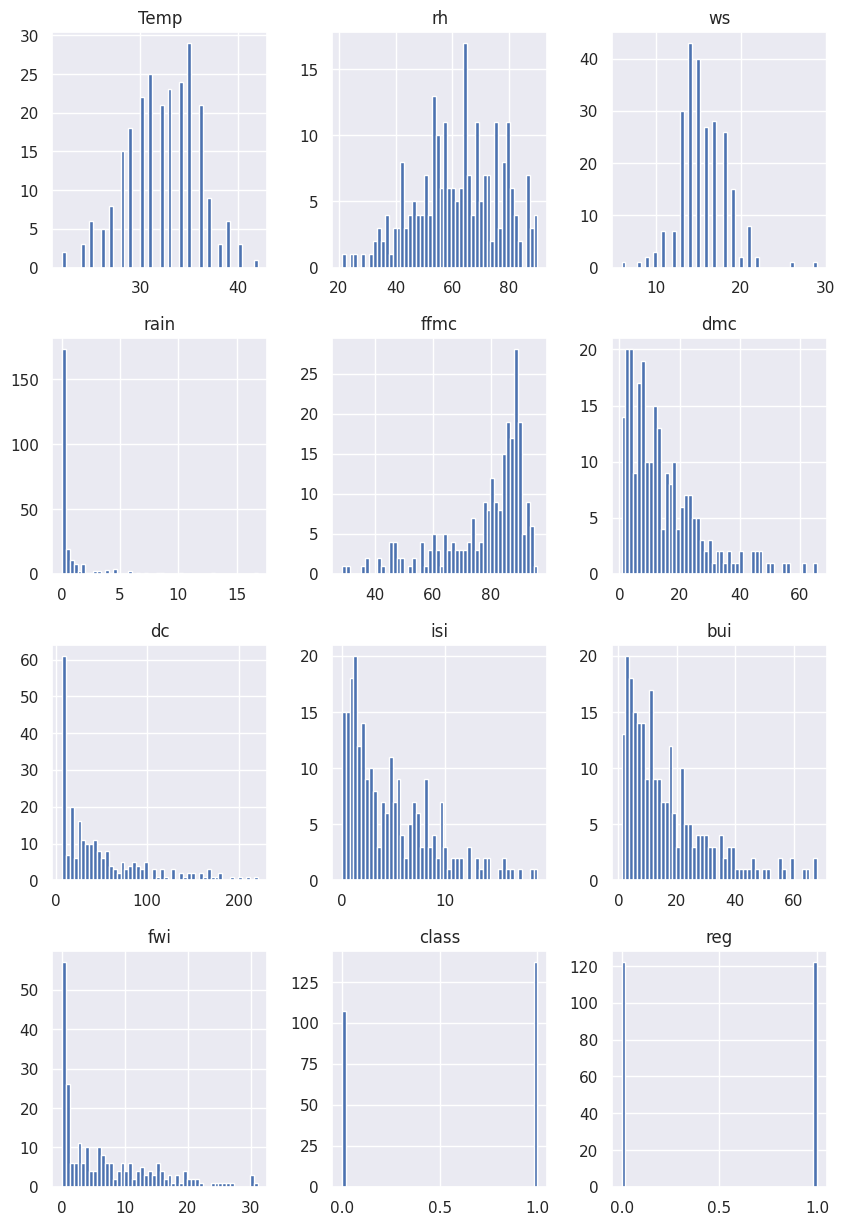

In [61]:
#Visualization:
sns.set_theme()
dfead.hist(bins=50,figsize=(10,15))
plt.show()

In [62]:
#percentaeg of pie chart
#to get percentage we use normalize and multipy by 100.
per=dfead['class'].value_counts(normalize=True)*100

In [63]:
per

class
1    56.147541
0    43.852459
Name: proportion, dtype: float64

Text(0.5, 1.0, 'PIE CHART')

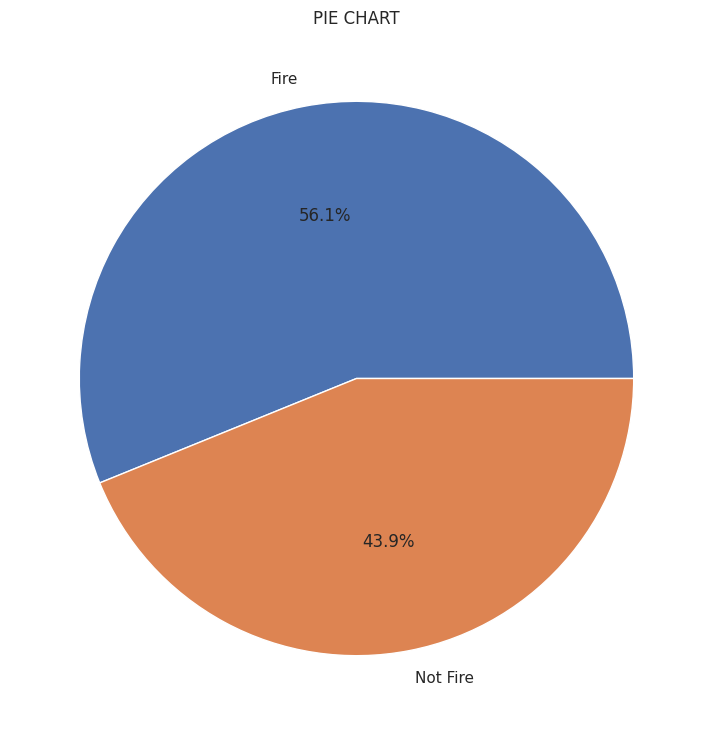

In [64]:
#1-fire
#0-not fire
#plotting pie chart
classlabels = ['Fire', 'Not Fire']
plt.figure(figsize=(15,9))
plt.pie(per, labels=classlabels, autopct='%1.1f%%')
plt.title("PIE CHART")

In [65]:
#Correlation:
dfead.corr()

Temp        rh        ws      rain      ffmc       dmc        dc  \
Temp   1.000000 -0.654443 -0.278132 -0.326786  0.677491  0.483105  0.370511   
rh    -0.654443  1.000000  0.236084  0.222968 -0.645658 -0.405133 -0.220344   
ws    -0.278132  0.236084  1.000000  0.170169 -0.163255 -0.001246  0.076253   
rain  -0.326786  0.222968  0.170169  1.000000 -0.544045 -0.288548 -0.296808   
ffmc   0.677491 -0.645658 -0.163255 -0.544045  1.000000  0.602391  0.503919   
dmc    0.483105 -0.405133 -0.001246 -0.288548  0.602391  1.000000  0.875362   
dc     0.370511 -0.220344  0.076253 -0.296808  0.503919  0.875362  1.000000   
isi    0.607551 -0.690637  0.015248 -0.347105  0.739730  0.674499  0.498926   
bui    0.455504 -0.348587  0.029756 -0.299171  0.589652  0.982073  0.941906   
fwi    0.562598 -0.575086  0.031060 -0.323897  0.689045  0.875819  0.739558   
class  0.506575 -0.420695 -0.073810 -0.376727  0.762942  0.584757  0.512609   
reg    0.273496 -0.406424 -0.176829 -0.041080  0.224680  0.191094 -0.081482   

            isi       bui       fwi     class       reg  
Temp   0.607551  0.455504  0.562598  0.506575  0.273496  
rh    -0.690637 -0.348587 -0.575086 -0.420695 -0.406424  
ws     0.015248  0.029756  0.031060 -0.073810 -0.176829  
rain  -0.347105 -0.299171 -0.323897 -0.376727 -0.041080  
ffmc   0.739730  0.589652  0.689045  0.762942  0.224680  
dmc    0.674499  0.982073  0.875819  0.584757  0.191094  
dc     0.498926  0.941906  0.739558  0.512609 -0.081482  
isi    1.000000  0.635891  0.913525  0.719419  0.268421  
bui    0.635891  1.000000  0.858043  0.586915  0.087370  
fwi    0.913525  0.858043  1.000000  0.718734  0.195247  
class  0.719419  0.586915  0.718734  1.000000  0.156928  
reg    0.268421  0.087370  0.195247  0.156928  1.000000

<Axes: >

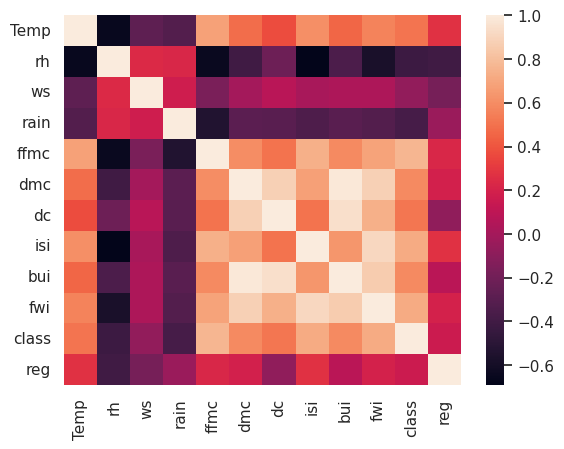

In [66]:
sns.heatmap(dfead.corr())

<Axes: ylabel='fwi'>

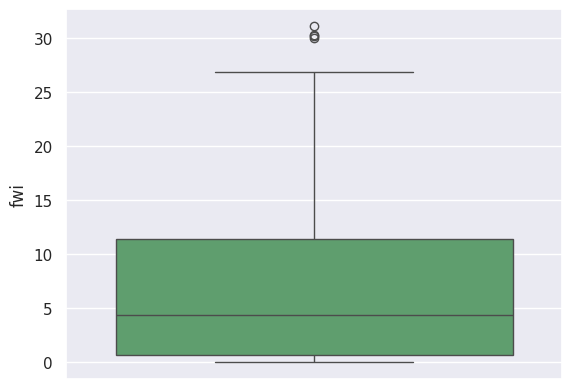

In [67]:
#Box plots: to check outliers
sns.boxplot(df['fwi'], color='g')

In [68]:
df

day  month  year  Temp  rh  ws  rain  ffmc   dmc    dc  isi   bui  fwi  \
0      1      6  2012    29  57  18   0.0  65.7   3.4   7.6  1.3   3.4  0.5   
1      2      6  2012    29  61  13   1.3  64.4   4.1   7.6  1.0   3.9  0.4   
2      3      6  2012    26  82  22  13.1  47.1   2.5   7.1  0.3   2.7  0.1   
3      4      6  2012    25  89  13   2.5  28.6   1.3   6.9  0.0   1.7  0.0   
4      5      6  2012    27  77  16   0.0  64.8   3.0  14.2  1.2   3.9  0.5   
..   ...    ...   ...   ...  ..  ..   ...   ...   ...   ...  ...   ...  ...   
239   26      9  2012    30  65  14   0.0  85.4  16.0  44.5  4.5  16.9  6.5   
240   27      9  2012    28  87  15   4.4  41.1   6.5   8.0  0.1   6.2  0.0   
241   28      9  2012    27  87  29   0.5  45.9   3.5   7.9  0.4   3.4  0.2   
242   29      9  2012    24  54  18   0.1  79.7   4.3  15.2  1.7   5.1  0.7   
243   30      9  2012    24  64  15   0.2  67.3   3.8  16.5  1.2   4.8  0.5   

            class  reg  
0     not fire       0  
1     not fire       0  
2     not fire       0  
3     not fire       0  
4     not fire       0  
..            ...  ...  
239       fire       1  
240   not fire       1  
241   not fire       1  
242   not fire       1  
243  not fire        1  

[244 rows x 15 columns]

In [69]:
dfnew=df

In [70]:
dfnew['class']=np.where(dfnew['class']==0, 'No Fire','Fire')

In [71]:
dfnew

day  month  year  Temp  rh  ws  rain  ffmc   dmc    dc  isi   bui  fwi  \
0      1      6  2012    29  57  18   0.0  65.7   3.4   7.6  1.3   3.4  0.5   
1      2      6  2012    29  61  13   1.3  64.4   4.1   7.6  1.0   3.9  0.4   
2      3      6  2012    26  82  22  13.1  47.1   2.5   7.1  0.3   2.7  0.1   
3      4      6  2012    25  89  13   2.5  28.6   1.3   6.9  0.0   1.7  0.0   
4      5      6  2012    27  77  16   0.0  64.8   3.0  14.2  1.2   3.9  0.5   
..   ...    ...   ...   ...  ..  ..   ...   ...   ...   ...  ...   ...  ...   
239   26      9  2012    30  65  14   0.0  85.4  16.0  44.5  4.5  16.9  6.5   
240   27      9  2012    28  87  15   4.4  41.1   6.5   8.0  0.1   6.2  0.0   
241   28      9  2012    27  87  29   0.5  45.9   3.5   7.9  0.4   3.4  0.2   
242   29      9  2012    24  54  18   0.1  79.7   4.3  15.2  1.7   5.1  0.7   
243   30      9  2012    24  64  15   0.2  67.3   3.8  16.5  1.2   4.8  0.5   

    class  reg  
0    Fire    0  
1    Fire    0  
2    Fire    0  
3    Fire    0  
4    Fire    0  
..    ...  ...  
239  Fire    1  
240  Fire    1  
241  Fire    1  
242  Fire    1  
243  Fire    1  

[244 rows x 15 columns]

Text(0.5, 1.0, 'Monthly Fire Analysis For Sidi-Bel Region')

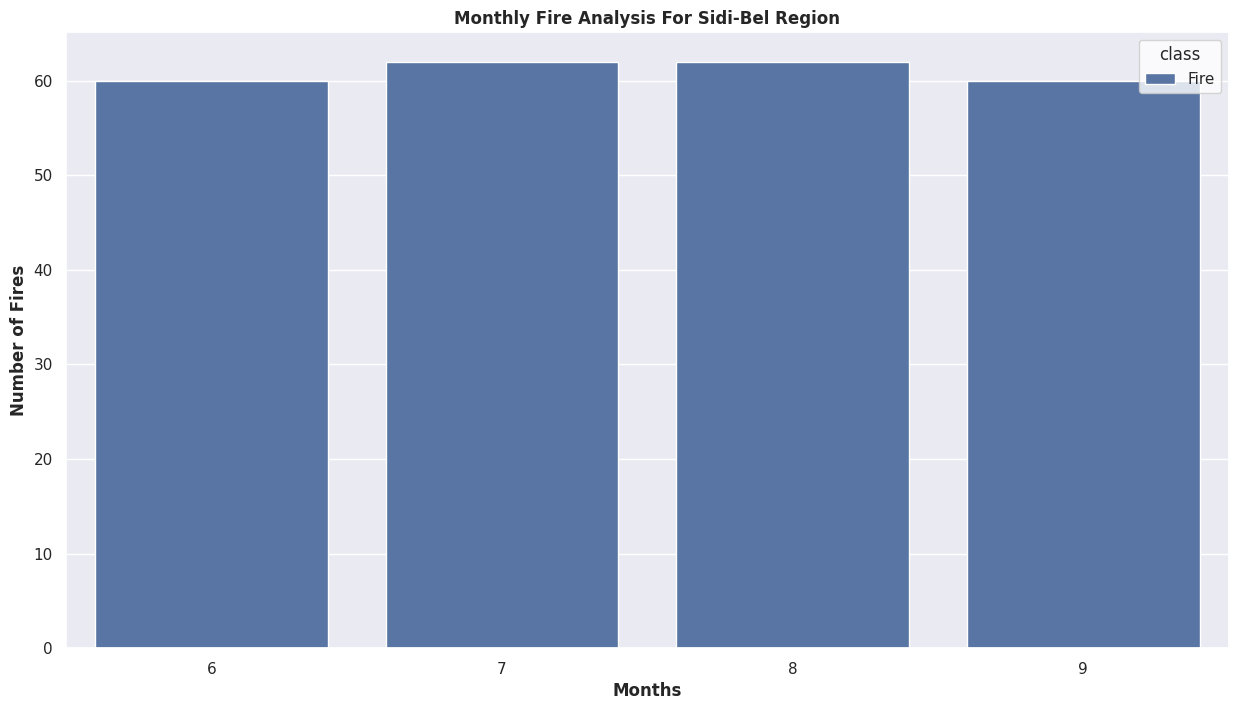

In [72]:
#monthy fire analysis
dftemp = dfnew.loc[dfnew['reg']==1]
plt.subplots(figsize=(15,8))
sns.set_style('whitegrid')
sns.countplot(x="month", hue="class", data=dfnew)
plt.xlabel("Months", weight="bold")
plt.ylabel("Number of Fires", weight="bold")
plt.title("Monthly Fire Analysis For Sidi-Bel Region", weight="bold")

Text(0.5, 1.0, 'Monthly Fire Analysis For Brjaia Region')

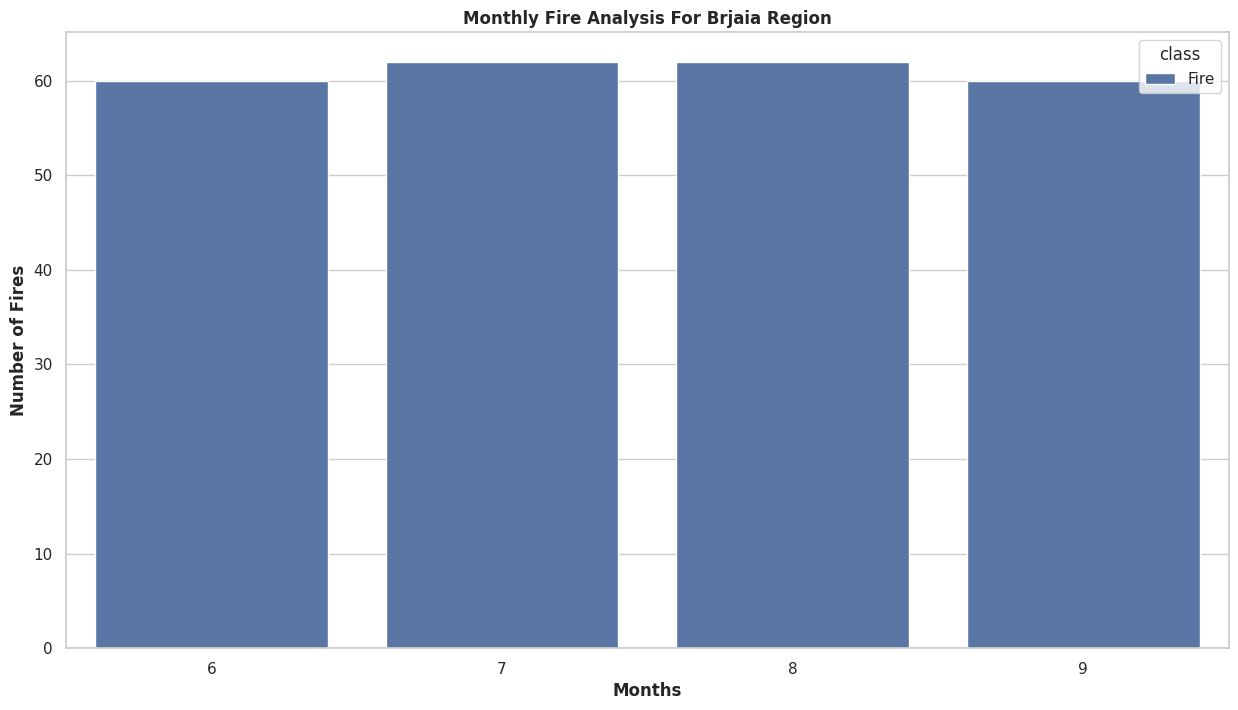

In [73]:
#monthy fire analysis
dftemp = dfnew.loc[dfnew['reg']==0]
plt.subplots(figsize=(15,8))
sns.set_style('whitegrid')
sns.countplot(x="month", hue="class", data=dfnew)
plt.xlabel("Months", weight="bold")
plt.ylabel("Number of Fires", weight="bold")
plt.title("Monthly Fire Analysis For Brjaia Region", weight="bold")

## 3. FEATURE SELECTION:

In [80]:
dffs = pd.read_csv("AlgerianForestFireCleaned.csv")

In [81]:
dffs

day  month  year  Temp  rh  ws  rain  ffmc   dmc    dc  isi   bui  fwi  \
0      1      6  2012    29  57  18   0.0  65.7   3.4   7.6  1.3   3.4  0.5   
1      2      6  2012    29  61  13   1.3  64.4   4.1   7.6  1.0   3.9  0.4   
2      3      6  2012    26  82  22  13.1  47.1   2.5   7.1  0.3   2.7  0.1   
3      4      6  2012    25  89  13   2.5  28.6   1.3   6.9  0.0   1.7  0.0   
4      5      6  2012    27  77  16   0.0  64.8   3.0  14.2  1.2   3.9  0.5   
..   ...    ...   ...   ...  ..  ..   ...   ...   ...   ...  ...   ...  ...   
239   26      9  2012    30  65  14   0.0  85.4  16.0  44.5  4.5  16.9  6.5   
240   27      9  2012    28  87  15   4.4  41.1   6.5   8.0  0.1   6.2  0.0   
241   28      9  2012    27  87  29   0.5  45.9   3.5   7.9  0.4   3.4  0.2   
242   29      9  2012    24  54  18   0.1  79.7   4.3  15.2  1.7   5.1  0.7   
243   30      9  2012    24  64  15   0.2  67.3   3.8  16.5  1.2   4.8  0.5   

            class  reg  
0     not fire       0  
1     not fire       0  
2     not fire       0  
3     not fire       0  
4     not fire       0  
..            ...  ...  
239       fire       1  
240   not fire       1  
241   not fire       1  
242   not fire       1  
243  not fire        1  

[244 rows x 15 columns]

In [82]:
dffs.drop(['day','month','year'], axis=1, inplace=True)

#inplace=True makes permanent changes

In [83]:
dffs

Temp  rh  ws  rain  ffmc   dmc    dc  isi   bui  fwi         class  reg
0      29  57  18   0.0  65.7   3.4   7.6  1.3   3.4  0.5   not fire       0
1      29  61  13   1.3  64.4   4.1   7.6  1.0   3.9  0.4   not fire       0
2      26  82  22  13.1  47.1   2.5   7.1  0.3   2.7  0.1   not fire       0
3      25  89  13   2.5  28.6   1.3   6.9  0.0   1.7  0.0   not fire       0
4      27  77  16   0.0  64.8   3.0  14.2  1.2   3.9  0.5   not fire       0
..    ...  ..  ..   ...   ...   ...   ...  ...   ...  ...           ...  ...
239    30  65  14   0.0  85.4  16.0  44.5  4.5  16.9  6.5       fire       1
240    28  87  15   4.4  41.1   6.5   8.0  0.1   6.2  0.0   not fire       1
241    27  87  29   0.5  45.9   3.5   7.9  0.4   3.4  0.2   not fire       1
242    24  54  18   0.1  79.7   4.3  15.2  1.7   5.1  0.7   not fire       1
243    24  64  15   0.2  67.3   3.8  16.5  1.2   4.8  0.5  not fire        1

[244 rows x 12 columns]

In [84]:
dffs['class'].value_counts()

class
fire             131
not fire         101
fire               4
not fire           3
fire               2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [85]:
#Encoding
dffs['class']=np.where(dffs['class'].str.contains("not fire"), 0,1)

In [86]:
dffs

Temp  rh  ws  rain  ffmc   dmc    dc  isi   bui  fwi  class  reg
0      29  57  18   0.0  65.7   3.4   7.6  1.3   3.4  0.5      0    0
1      29  61  13   1.3  64.4   4.1   7.6  1.0   3.9  0.4      0    0
2      26  82  22  13.1  47.1   2.5   7.1  0.3   2.7  0.1      0    0
3      25  89  13   2.5  28.6   1.3   6.9  0.0   1.7  0.0      0    0
4      27  77  16   0.0  64.8   3.0  14.2  1.2   3.9  0.5      0    0
..    ...  ..  ..   ...   ...   ...   ...  ...   ...  ...    ...  ...
239    30  65  14   0.0  85.4  16.0  44.5  4.5  16.9  6.5      1    1
240    28  87  15   4.4  41.1   6.5   8.0  0.1   6.2  0.0      0    1
241    27  87  29   0.5  45.9   3.5   7.9  0.4   3.4  0.2      0    1
242    24  54  18   0.1  79.7   4.3  15.2  1.7   5.1  0.7      0    1
243    24  64  15   0.2  67.3   3.8  16.5  1.2   4.8  0.5      0    1

[244 rows x 12 columns]

### Regression:

In [87]:
#Independent and Dependent Features:
X=dffs.drop('fwi', axis=1)
y=dffs['fwi']

In [88]:
X

Temp  rh  ws  rain  ffmc   dmc    dc  isi   bui  class  reg
0      29  57  18   0.0  65.7   3.4   7.6  1.3   3.4      0    0
1      29  61  13   1.3  64.4   4.1   7.6  1.0   3.9      0    0
2      26  82  22  13.1  47.1   2.5   7.1  0.3   2.7      0    0
3      25  89  13   2.5  28.6   1.3   6.9  0.0   1.7      0    0
4      27  77  16   0.0  64.8   3.0  14.2  1.2   3.9      0    0
..    ...  ..  ..   ...   ...   ...   ...  ...   ...    ...  ...
239    30  65  14   0.0  85.4  16.0  44.5  4.5  16.9      1    1
240    28  87  15   4.4  41.1   6.5   8.0  0.1   6.2      0    1
241    27  87  29   0.5  45.9   3.5   7.9  0.4   3.4      0    1
242    24  54  18   0.1  79.7   4.3  15.2  1.7   5.1      0    1
243    24  64  15   0.2  67.3   3.8  16.5  1.2   4.8      0    1

[244 rows x 11 columns]

In [89]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
239    6.5
240    0.0
241    0.2
242    0.7
243    0.5
Name: fwi, Length: 244, dtype: float64

In [90]:
#TrainTest Split:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=42)


In [91]:
X_train

Temp  rh  ws  rain  ffmc   dmc     dc   isi   bui  class  reg
234    35  34  17   0.0  92.2  23.6   97.3  13.8  29.4      1    1
227    28  81  15   0.0  84.6  12.6   41.5   4.3  14.3      1    1
180    34  59  16   0.0  88.1  19.5   47.2   7.4  19.5      1    1
5      31  67  14   0.0  82.6   5.8   22.2   3.1   7.0      1    0
56     36  48  13   0.0  90.3  22.2  108.5   8.7  29.4      1    0
..    ...  ..  ..   ...   ...   ...    ...   ...   ...    ...  ...
106    24  82  15   0.4  44.9   0.9    7.3   0.2   1.4      0    0
14     28  80  17   3.1  49.4   3.0    7.4   0.4   3.0      0    0
92     25  76  17   7.2  46.0   1.3    7.5   0.2   1.8      0    0
179    33  57  16   0.0  87.5  15.7   37.6   6.7  15.7      1    1
102    30  77  21   1.8  58.5   1.9    8.4   1.1   2.4      0    0

[170 rows x 11 columns]

In [92]:
X_test

Temp  rh  ws  rain  ffmc   dmc      dc   isi   bui  class  reg
24     31  64  15   0.0  86.7  14.2   63.80   5.7  18.3      1    0
6      33  54  13   0.0  88.2   9.9   30.50   6.4  10.9      1    0
153    33  48  16   0.0  87.6   7.9   17.80   6.8   7.8      1    1
211    35  53  17   0.5  80.2  20.7  149.20   2.7  30.6      1    1
198    40  41  10   0.1  92.0  22.6   65.10   9.5  24.2      1    1
..    ...  ..  ..   ...   ...   ...     ...   ...   ...    ...  ...
165    37  37  18   0.2  88.9  12.9   14.69  12.5  10.4      0    1
154    34  56  17   0.1  84.7   9.7   27.30   4.7  10.3      1    1
216    28  75  16   0.0  82.2   4.4   24.30   3.3   6.0      1    1
79     35  62  19   0.0  89.4  23.2  120.90   9.7  31.3      1    0
29     33  50  14   0.0  88.7  22.9   92.80   7.2  28.3      1    0

[74 rows x 11 columns]

In [93]:
y_train

234    21.6
227     5.7
180    10.9
5       2.5
56     15.3
       ... 
106     0.0
14      0.1
92      0.1
179     9.0
102     0.3
Name: fwi, Length: 170, dtype: float64

In [94]:
y_test

24      8.4
6       7.2
153     6.4
211     5.9
198    14.8
       ... 
165     4.5
154     5.2
216     2.5
79     17.2
29     12.9
Name: fwi, Length: 74, dtype: float64

In [95]:
#feature Selection - based on Correlation:
X_train.corr()
#correlation based on independent features

Temp        rh        ws      rain      ffmc       dmc        dc  \
Temp   1.000000 -0.650319 -0.248276 -0.368079  0.700507  0.478403  0.368775   
rh    -0.650319  1.000000  0.234218  0.254956 -0.639337 -0.379315 -0.199280   
ws    -0.248276  0.234218  1.000000  0.262905 -0.158314  0.007078  0.092297   
rain  -0.368079  0.254956  0.262905  1.000000 -0.573040 -0.289100 -0.293873   
ffmc   0.700507 -0.639337 -0.158314 -0.573040  1.000000  0.604870  0.506945   
dmc    0.478403 -0.379315  0.007078 -0.289100  0.604870  1.000000  0.875902   
dc     0.368775 -0.199280  0.092297 -0.293873  0.506945  0.875902  1.000000   
isi    0.595906 -0.689007  0.020803 -0.347230  0.743480  0.646728  0.488943   
bui    0.452415 -0.326874  0.043831 -0.299200  0.594823  0.981662  0.940235   
class  0.514287 -0.436951 -0.073409 -0.384644  0.771800  0.593237  0.508999   
reg    0.249566 -0.399577 -0.213898 -0.090312  0.229336  0.197265 -0.079082   

            isi       bui     class       reg  
Temp   0.595906  0.452415  0.514287  0.249566  
rh    -0.689007 -0.326874 -0.436951 -0.399577  
ws     0.020803  0.043831 -0.073409 -0.213898  
rain  -0.347230 -0.299200 -0.384644 -0.090312  
ffmc   0.743480  0.594823  0.771800  0.229336  
dmc    0.646728  0.981662  0.593237  0.197265  
dc     0.488943  0.940235  0.508999 -0.079082  
isi    1.000000  0.618680  0.747106  0.262424  
bui    0.618680  1.000000  0.595853  0.092850  
class  0.747106  0.595853  1.000000  0.140707  
reg    0.262424  0.092850  0.140707  1.000000

<Axes: >

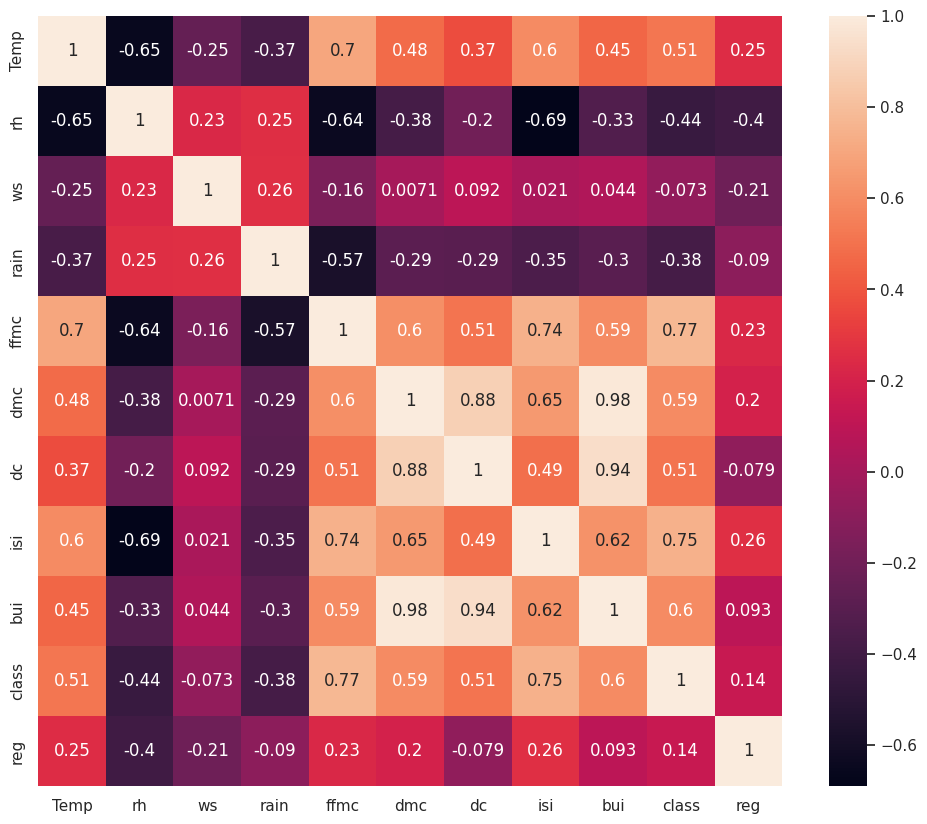

In [96]:
#so based on this highly correlated features can be removed.
#multicollinearity check:(this means independent features shouldn't be highly. correlated.)

plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr, annot=True)



In [97]:
#we will pass a dataset and a threshold value(based on threshold percentage will check for feature that are correlated)
#if it is above threshold means highly correlated then can remove the feature.

def correlation(dataset, threshold):
  #to get unique features
  col_corr = set()
  corr_matrix = dataset.corr()
  #iterating through each and every features
  for i in range(len(corr_matrix.columns)):
    #comparing aloong with otjer columns
    for j in range(i):
      #if that correlation is greater than threshold.
      if abs(corr_matrix.iloc[i,j])>threshold:
        colname = corr_matrix.columns[i] #taking column name.
        col_corr.add(colname) #adding to set
  return col_corr




In [98]:
correlation(X_train, 0.90)

{'bui'}

In [99]:
#threshold is normally set by domain expertise.
corrfeat=correlation(X_train, 0.85) #85%

In [100]:
corrfeat

{'bui', 'dc'}

In [101]:
#Drop these highly correlated features:
X_train.drop(corrfeat, axis=1, inplace=True)

In [102]:
X_train

Temp  rh  ws  rain  ffmc   dmc   isi  class  reg
234    35  34  17   0.0  92.2  23.6  13.8      1    1
227    28  81  15   0.0  84.6  12.6   4.3      1    1
180    34  59  16   0.0  88.1  19.5   7.4      1    1
5      31  67  14   0.0  82.6   5.8   3.1      1    0
56     36  48  13   0.0  90.3  22.2   8.7      1    0
..    ...  ..  ..   ...   ...   ...   ...    ...  ...
106    24  82  15   0.4  44.9   0.9   0.2      0    0
14     28  80  17   3.1  49.4   3.0   0.4      0    0
92     25  76  17   7.2  46.0   1.3   0.2      0    0
179    33  57  16   0.0  87.5  15.7   6.7      1    1
102    30  77  21   1.8  58.5   1.9   1.1      0    0

[170 rows x 9 columns]

In [103]:
X_test.drop(corrfeat, axis=1, inplace=True)

In [104]:
X_test

Temp  rh  ws  rain  ffmc   dmc   isi  class  reg
24     31  64  15   0.0  86.7  14.2   5.7      1    0
6      33  54  13   0.0  88.2   9.9   6.4      1    0
153    33  48  16   0.0  87.6   7.9   6.8      1    1
211    35  53  17   0.5  80.2  20.7   2.7      1    1
198    40  41  10   0.1  92.0  22.6   9.5      1    1
..    ...  ..  ..   ...   ...   ...   ...    ...  ...
165    37  37  18   0.2  88.9  12.9  12.5      0    1
154    34  56  17   0.1  84.7   9.7   4.7      1    1
216    28  75  16   0.0  82.2   4.4   3.3      1    1
79     35  62  19   0.0  89.4  23.2   9.7      1    0
29     33  50  14   0.0  88.7  22.9   7.2      1    0

[74 rows x 9 columns]

## 4. Feature Scaling / Standardization:

In [105]:
#Feature Scaling or Standardization:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [106]:
X_train_scaled

array([[ 0.7959066 , -1.94944205,  0.57272408, ...,  2.20294793,
         0.93173594,  0.98830369],
       [-1.07219765,  1.24498821, -0.18496536, ..., -0.07722954,
         0.93173594,  0.98830369],
       [ 0.52903456, -0.25027701,  0.19387936, ...,  0.66682837,
         0.93173594,  0.98830369],
       ...,
       [-1.87281375,  0.90515521,  0.57272408, ..., -1.06130614,
        -1.07326545, -1.01183473],
       [ 0.26216253, -0.38621022,  0.19387936, ...,  0.4988153 ,
         0.93173594,  0.98830369],
       [-0.53845358,  0.97312181,  2.08810297, ..., -0.84528932,
        -1.07326545, -1.01183473]])

In [107]:
X_test_scaled

array([[-2.71581542e-01,  8.95559923e-02, -1.84965365e-01,
        -3.84926784e-01,  6.55802741e-01, -3.45759694e-02,
         2.58796614e-01,  9.31735943e-01, -1.01183473e+00],
       [ 2.62162529e-01, -5.90110020e-01, -9.42654810e-01,
        -3.84926784e-01,  7.59299274e-01, -3.78922477e-01,
         4.26809691e-01,  9.31735943e-01, -1.01183473e+00],
       [ 2.62162529e-01, -9.97909628e-01,  1.93879358e-01,
        -3.84926784e-01,  7.17900661e-01, -5.39083644e-01,
         5.22817163e-01,  9.31735943e-01,  9.88303691e-01],
       [ 7.95906599e-01, -6.58076622e-01,  5.72724081e-01,
        -1.57080150e-01,  2.07317762e-01,  4.85947821e-01,
        -4.61259431e-01,  9.31735943e-01,  9.88303691e-01],
       [ 2.13026677e+00, -1.47367584e+00, -2.07918898e+00,
        -3.39357457e-01,  1.02149049e+00,  6.38100929e-01,
         1.17086760e+00,  9.31735943e-01,  9.88303691e-01],
       [ 1.86339474e+00,  8.95559923e-02, -2.45803370e+00,
         1.61905138e-01, -2.34267448e-01, -2.347774

Text(0.5, 1.0, 'X_train after Scaling:')

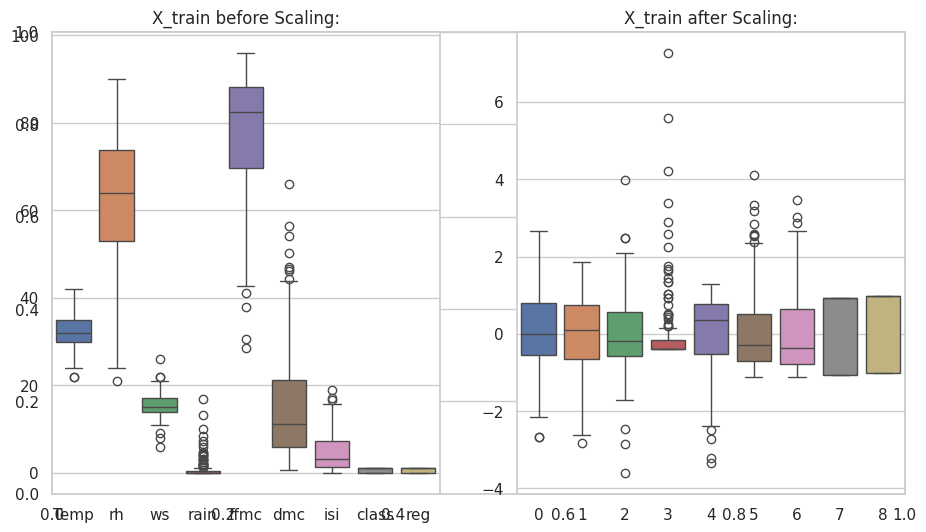

In [108]:
#Outliers look w.rt data-Standardized data
#Box plots to understand effect of Standard Scaler

plt.subplots(figsize=(11,6))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train before Scaling:")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train after Scaling:")

# 1. LINEAR REGRESSION:

In [109]:
X_train.shape

(170, 9)

In [110]:
y_train.shape

(170,)

In [113]:
X_train.shape[1] #no. of columns

9

In [116]:
X_train.iloc[:, 3]  #column entire (iterating all columns)

234    0.0
227    0.0
180    0.0
5      0.0
56     0.0
      ... 
106    0.4
14     3.1
92     7.2
179    0.0
102    1.8
Name: rain, Length: 170, dtype: float64

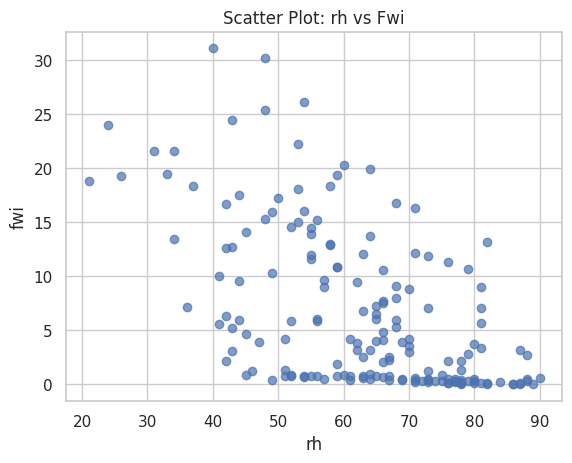

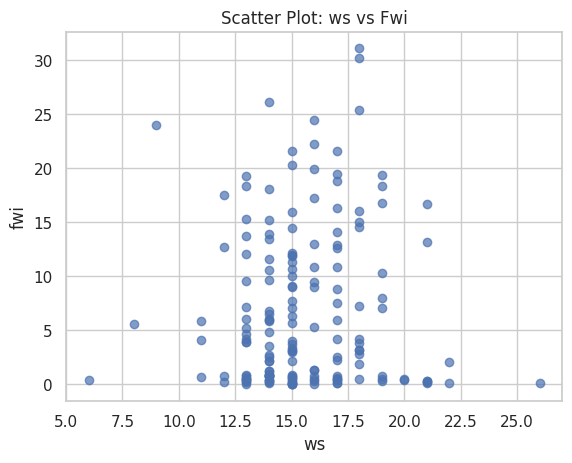

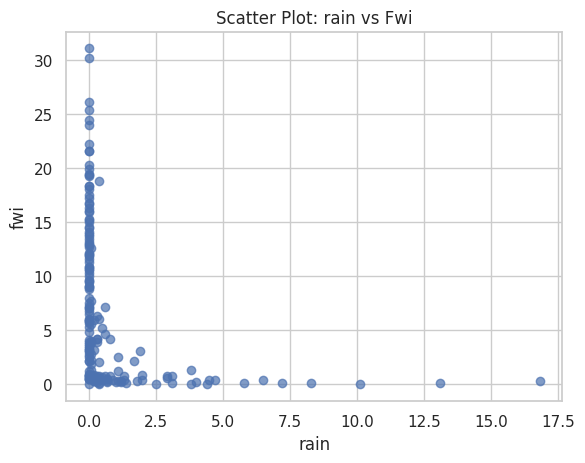

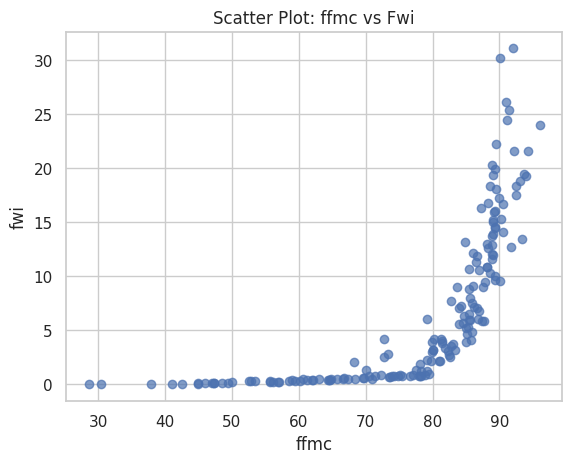

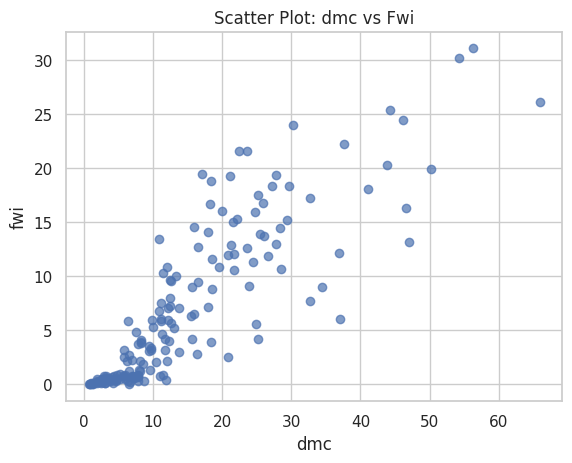

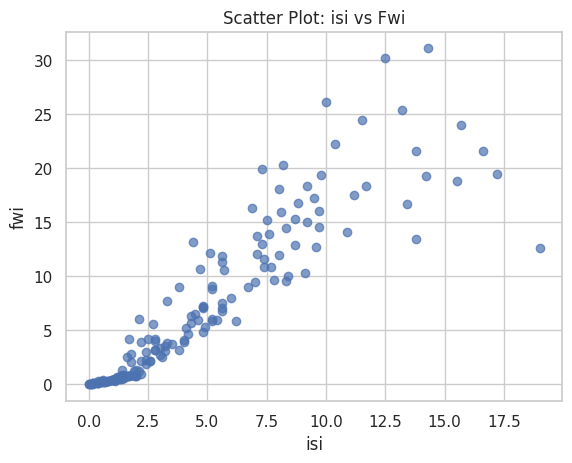

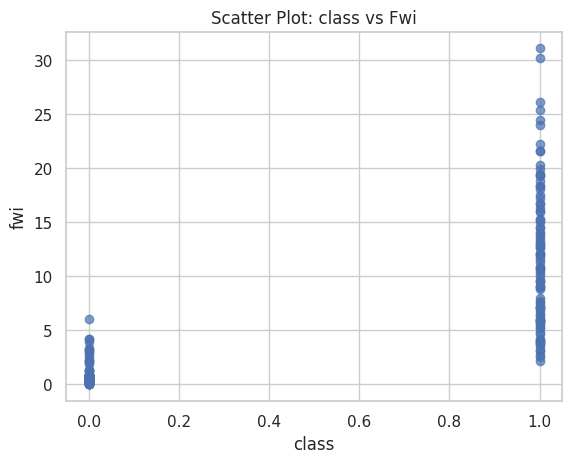

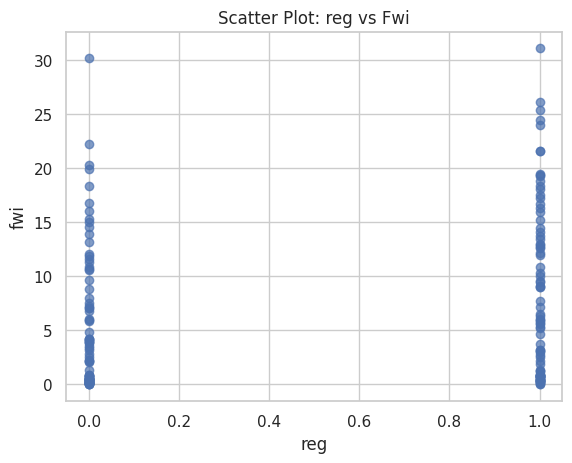

In [117]:
#why linear - will check on data: (each input feature and output feat)
for i in range(1, X_train.shape[1]):
  plt.figure()  # Create a new figure for each feature
  plt.scatter(X_train.iloc[:, i], y_train, alpha=0.7)
  plt.xlabel(f"{X_train.columns[i]}")
  plt.ylabel("fwi")
  plt.title(f"Scatter Plot: {X_train.columns[i]} vs Fwi")
  plt.grid(True)

In [118]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

linregmodel = LinearRegression() #intialize
linregmodel.fit(X_train_scaled, y_train) #training model
y_predlegmod = linregmodel.predict(X_test_scaled)
mse = mean_squared_error(y_predlegmod, y_test)
mae = mean_absolute_error(y_predlegmod, y_test)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

#Accuracy:
score = r2_score(y_test, y_predlegmod)
adjscore = 1-(1-score)*(len(y)-1)/(len(y)-X.shape[1]-1)
#adj R2 = 1-(1-R^2)*(n-1)/(n-p-1)

print("Accuarcy using R2 Score:", score*100)
print("Accuaracy using adj R2:", adjscore*100)


Mean Squared Error: 1.7718127510284585
Mean Absolute Error: 0.688541657175001
Accuarcy using R2 Score: 96.91735383351222
Accuaracy using adj R2: 96.77119388596324


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature name

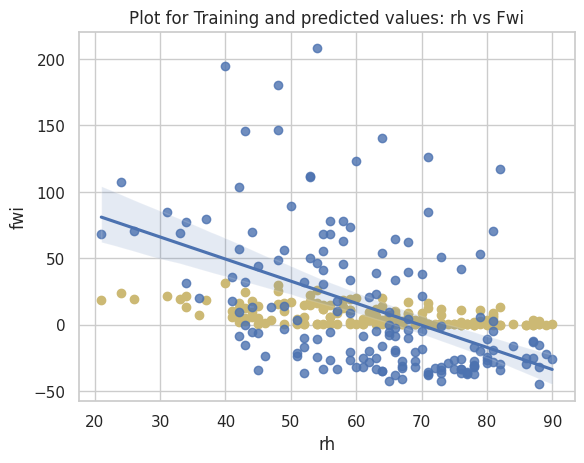

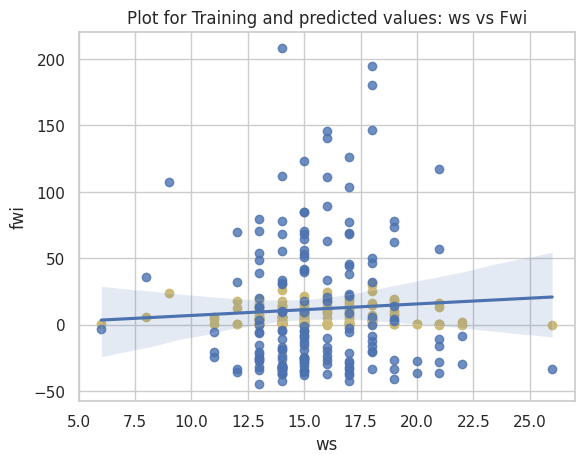

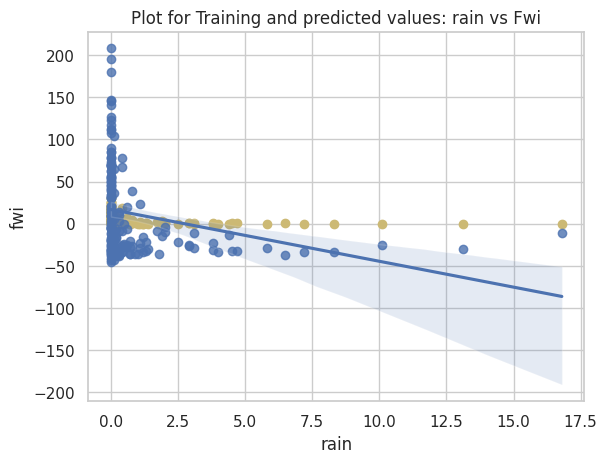

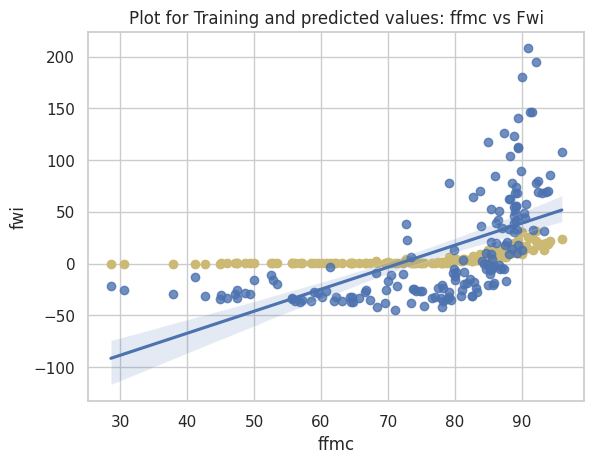

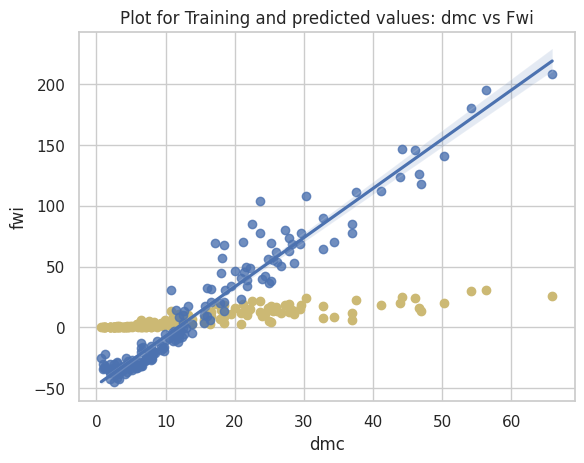

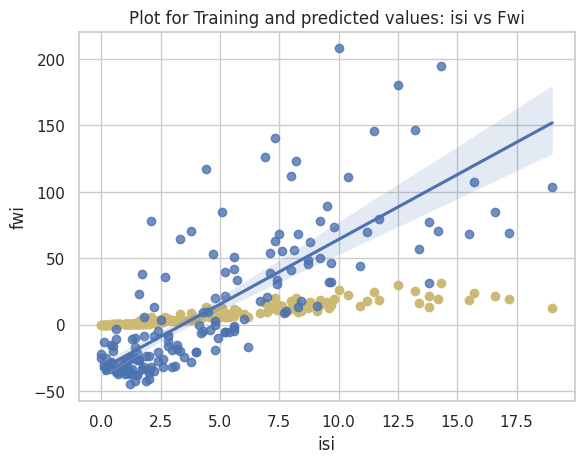

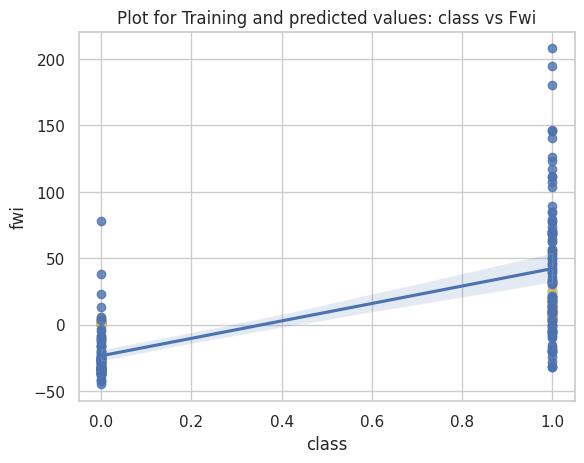

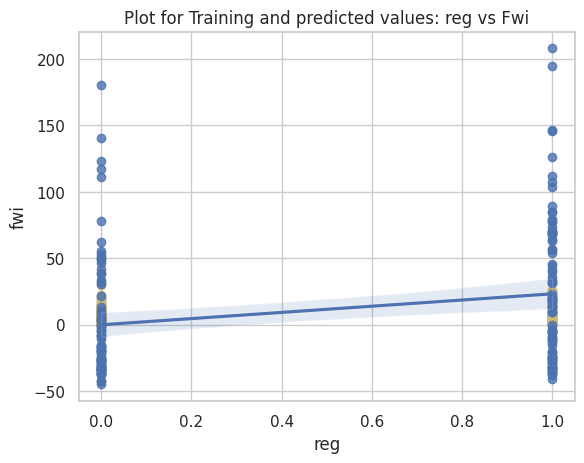

In [119]:
for i in range(1, X_train.shape[1]):
  plt.figure()  # Create a new figure for each feature
  plt.scatter(x=X_train.iloc[:, i],y=y_train, color='y')
  sns.regplot(x=X_train.iloc[:, i],y=linregmodel.predict(X_train), color='b')
  plt.xlabel(f"{X_train.columns[i]}")
  plt.ylabel("fwi")
  plt.title(f"Plot for Training and predicted values: {X_train.columns[i]} vs Fwi")
  plt.grid(True)

In [ ]:
linregmodel

LinearRegression()

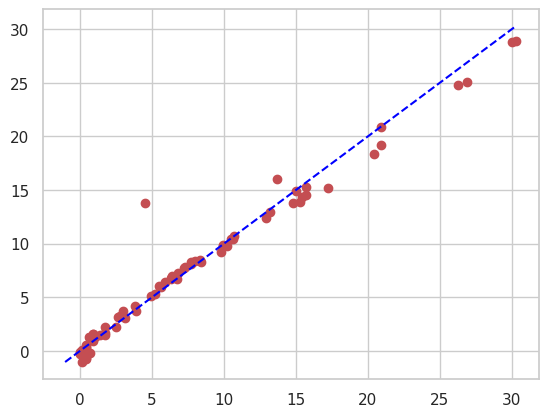

In [ ]:
plt.scatter(y_test, y_predlegmod, c='r') #linear line-good model.
min_val = min(min(y_test), min(y_predlegmod))  # Smallest value for reference
max_val = max(max(y_test), max(y_predlegmod))  # Largest value for reference
plt.plot([min_val, max_val], [min_val, max_val], color='blue', linestyle='--', label='Ideal Fit')


In [120]:
residual = y_test-y_predlegmod

In [121]:
residual

24     0.155782
6     -0.545658
153   -0.593527
211   -0.553444
198    1.010296
         ...   
165   -9.288320
154   -0.092326
216    0.292087
79     2.012741
29     0.553288
Name: fwi, Length: 74, dtype: float64

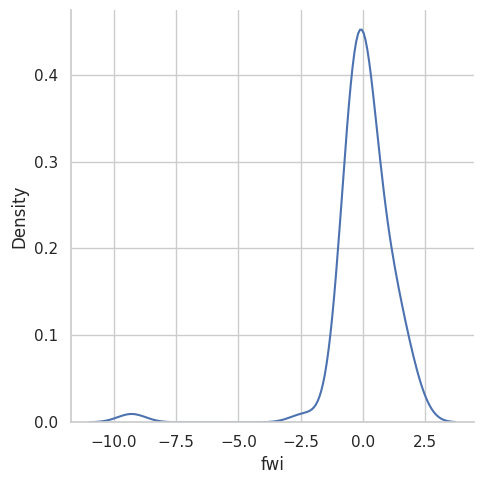

In [122]:
sns.displot(residual, kind='kde') #if normal distribution good curve.

#2. LASSO REGRESSION:

In [125]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

lassomodel = Lasso() #intialize
lassomodel.fit(X_train_scaled, y_train) #training model
y_predlassomod = lassomodel.predict(X_test_scaled)
mse = mean_squared_error(y_predlassomod, y_test)
mae = mean_absolute_error(y_predlassomod, y_test)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

#Accuracy:
score = r2_score(y_test, y_predlassomod)
adjscore = 1-(1-score)*(len(y)-1)/(len(y)-X.shape[1]-1)
#adj R2 = 1-(1-R^2)*(n-1)/(n-p-1)

print("Accuarcy using R2 Score:", score*100)
print("Accuaracy using adj R2:", adjscore*100)


Mean Squared Error: 4.134525766237706
Mean Absolute Error: 1.3477094061307926
Accuarcy using R2 Score: 92.80664393224423
Accuaracy using adj R2: 92.46557963592822


In [127]:
#above lasso model may be fixing the linear overfitting model by selecting the features.

# 3. RIDGE REGRESSION:

In [128]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

ridgemodel = Ridge() #intialize
ridgemodel.fit(X_train_scaled, y_train) #training model
y_predridgemod = ridgemodel.predict(X_test_scaled)
mse = mean_squared_error(y_predridgemod, y_test)
mae = mean_absolute_error(y_predridgemod, y_test)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

#Accuracy:
score = r2_score(y_test, y_predridgemod)
adjscore = 1-(1-score)*(len(y)-1)/(len(y)-X.shape[1]-1)
#adj R2 = 1-(1-R^2)*(n-1)/(n-p-1)

print("Accuarcy using R2 Score:", score*100)
print("Accuaracy using adj R2:", adjscore*100)

Mean Squared Error: 1.794647719075168
Mean Absolute Error: 0.7151462898656125
Accuarcy using R2 Score: 96.87762495884971
Accuaracy using adj R2: 96.72958131465722


In [129]:
#reduces overifitting.
#performs hyperparamter tuning

In [132]:
#combining both ridge and Lasso:

# ELASTICNET REGRESSION:

In [133]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

elasnetmodel = ElasticNet() #intialize
elasnetmodel.fit(X_train_scaled, y_train) #training model
y_predelasnetmod = elasnetmodel.predict(X_test_scaled)
mse = mean_squared_error(y_predelasnetmod, y_test)
mae = mean_absolute_error(y_predelasnetmod, y_test)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

#Accuracy:
score = r2_score(y_test, y_predelasnetmod)
adjscore = 1-(1-score)*(len(y)-1)/(len(y)-X.shape[1]-1)
#adj R2 = 1-(1-R^2)*(n-1)/(n-p-1)

print("Accuarcy using R2 Score:", score*100)
print("Accuaracy using adj R2:", adjscore*100)

Mean Squared Error: 7.934294171966476
Mean Absolute Error: 2.0283486787128653
Accuarcy using R2 Score: 86.1957074759725
Accuaracy using adj R2: 85.54119360629878


In [134]:
#this above values are for defalut values. can change importance to l1 and l2.


### CROSS VALIDATION

LASSO CV:

In [136]:
from sklearn.linear_model import LassoCV
lassocrossval = LassoCV(cv=5)
lassocrossval.fit(X_train_scaled, y_train)

LassoCV(cv=5)

In [137]:
lassocrossval.predict(X_test_scaled)

array([ 8.23833181,  7.73044507,  6.97671064,  6.29238183, 13.82296826,
        1.39790003, 10.65605596, -1.11012921,  1.77642684, -0.41753129,
        0.56230353,  4.29931959,  1.78169221,  1.54390356, 18.23653653,
        6.85043283, 24.71899278, -0.40969022,  7.34578887,  5.11509379,
        1.77026976,  0.19940408,  8.07264981,  0.20876233, 20.82022353,
       -0.13191354,  5.94656092,  9.78803511,  3.68674048, 14.90348826,
        8.44853805, -0.52451591, 10.39138886, 14.40669024,  1.51388676,
        1.52567539,  1.01771129,  5.92272522, -0.47333924, -0.31831869,
        6.54457023,  3.0867644 ,  3.2271718 , -0.58079115, 15.22875664,
        8.4006531 ,  8.45635307,  1.33281619, 10.23800925,  9.26321466,
       28.69355553,  2.24508832,  7.98591083, 19.14147534, 13.782521  ,
       15.96461218, 28.59867364, -0.09947526, -0.34942122, 14.25628632,
        9.91215657,  1.16848953, 12.91727317,  3.8591821 ,  3.21310217,
       -0.4813576 ,  9.73949687,  6.86376059, 24.89418537, 13.93

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LassoCV was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LassoCV was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LassoCV was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LassoCV was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LassoCV was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LassoCV was fitted without feature nam

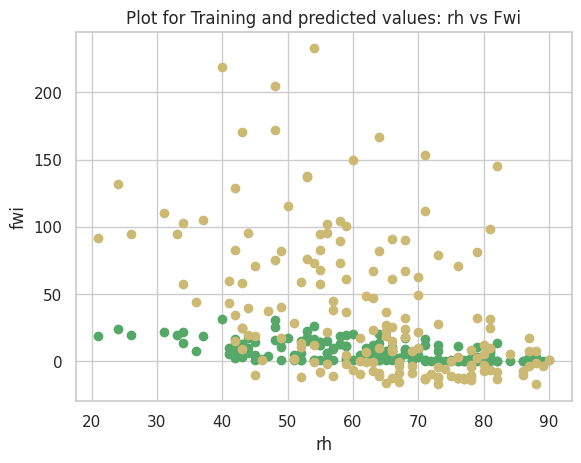

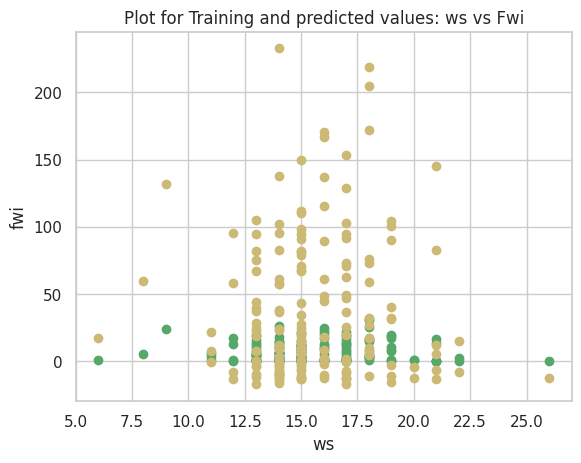

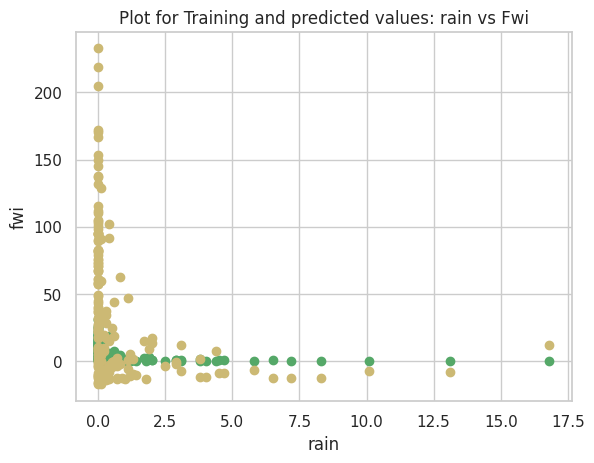

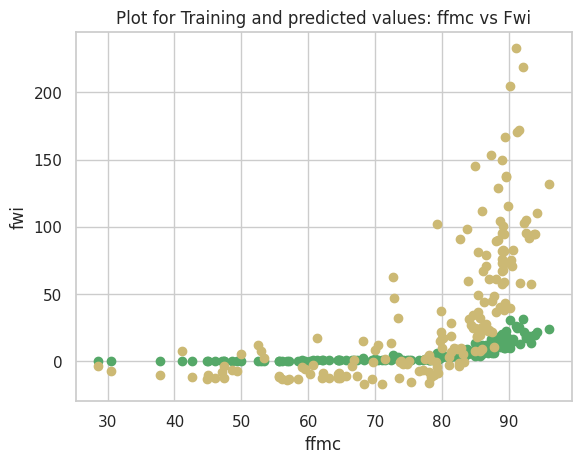

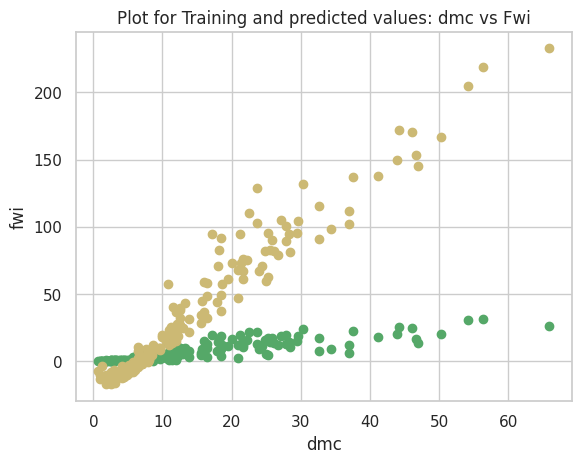

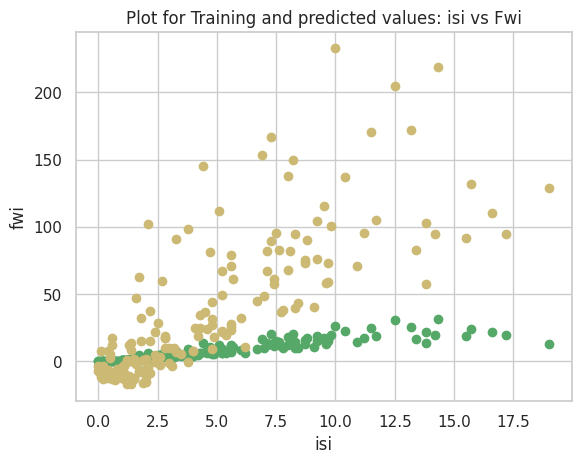

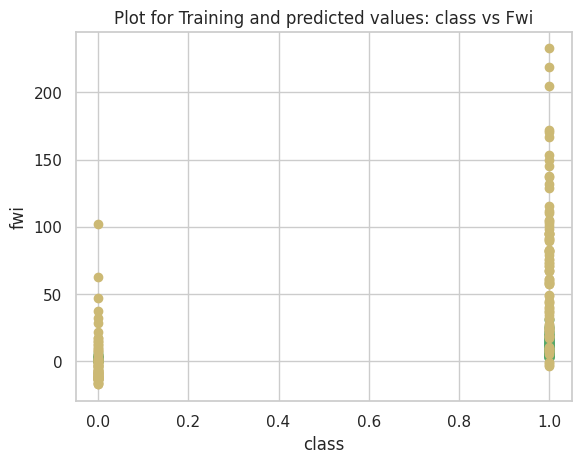

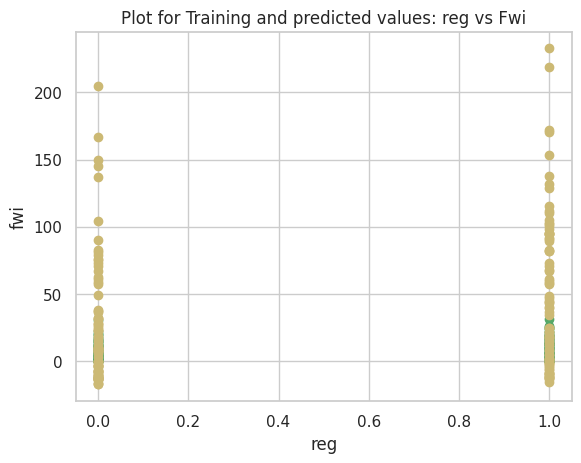

In [138]:
for i in range(1, X_train.shape[1]):
  plt.figure()  # Create a new figure for each feature
  plt.scatter(x=X_train.iloc[:, i],y=y_train, color='g')
  plt.scatter(x=X_train.iloc[:, i],y=lassocrossval.predict(X_train), color='y')
  #sns.regplot(x=X_train.iloc[:, i],y=lassocrossval.predict(X_train), color='r')
  plt.xlabel(f"{X_train.columns[i]}")
  plt.ylabel("fwi")
  plt.title(f"Plot for Training and predicted values: {X_train.columns[i]} vs Fwi")
  plt.grid(True)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LassoCV was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LassoCV was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LassoCV was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LassoCV was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LassoCV was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LassoCV was fitted without feature nam

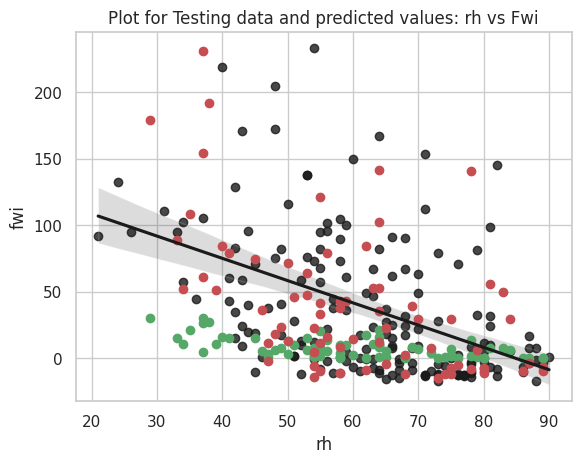

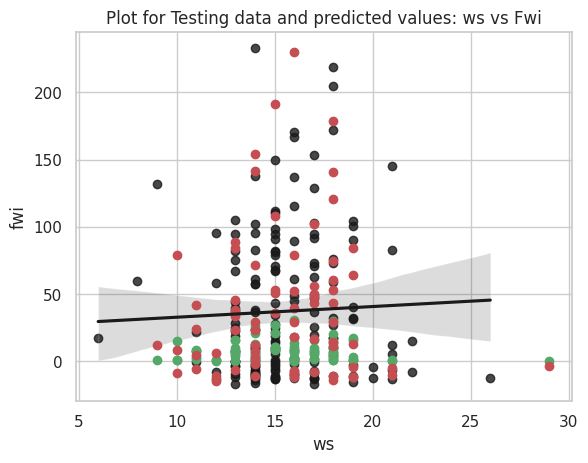

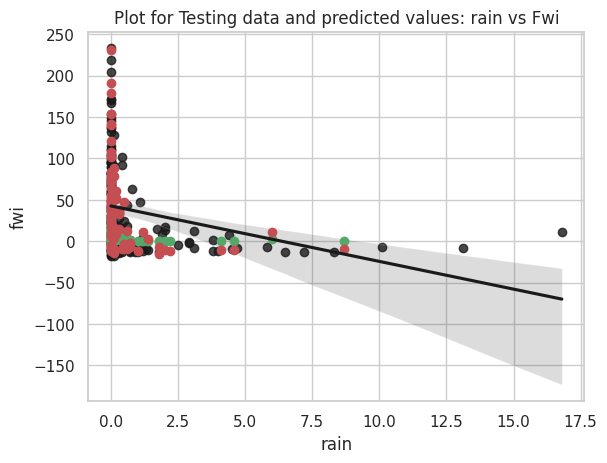

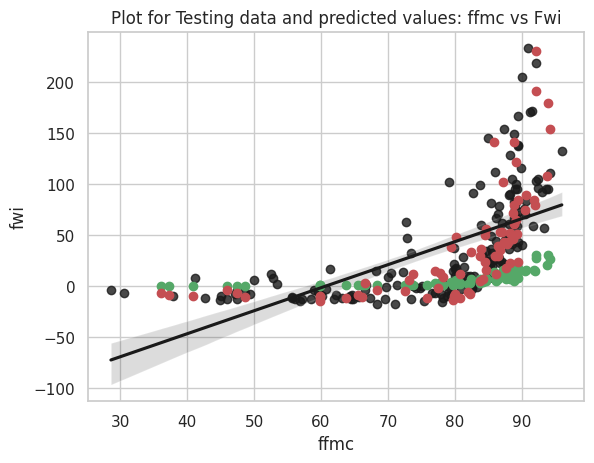

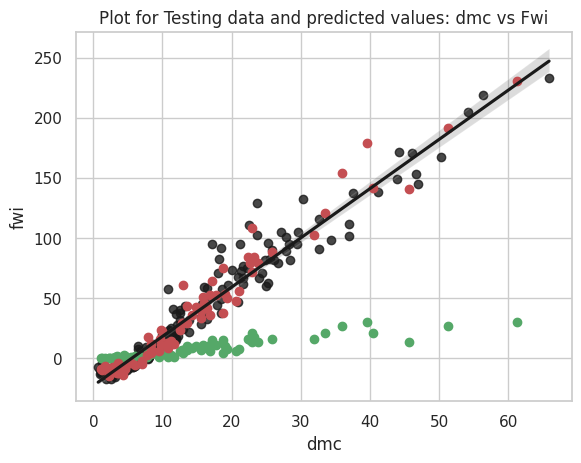

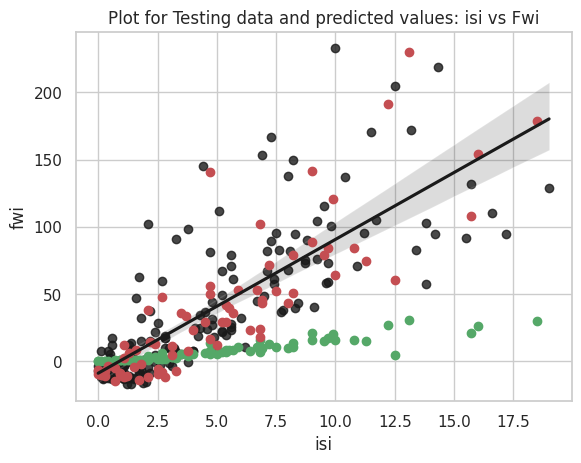

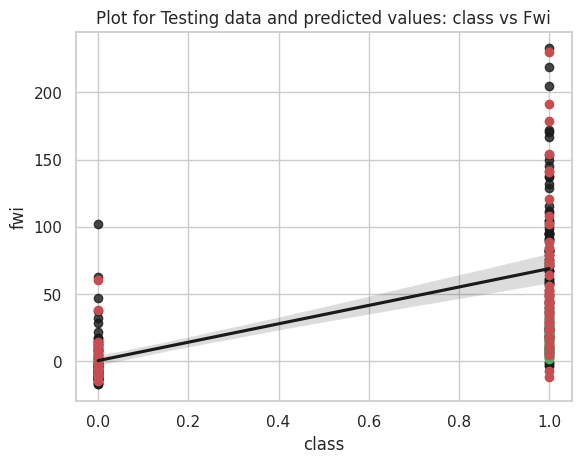

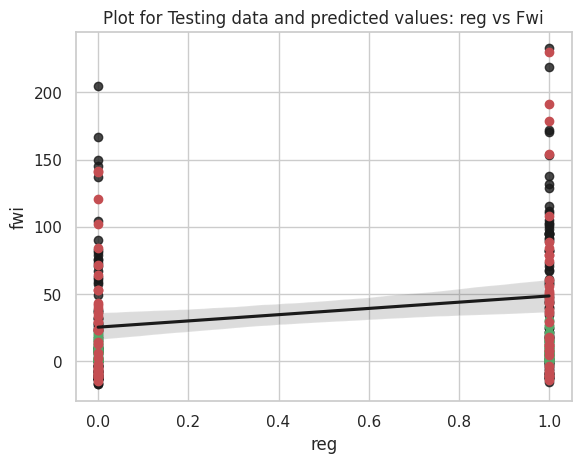

In [139]:
for i in range(1, X_test.shape[1]):
  plt.figure()  # Create a new figure for each feature
  sns.regplot(x=X_train.iloc[:, i],y=lassocrossval.predict(X_train), color='k')
  plt.scatter(x=X_test.iloc[:, i],y=y_test, color='g')
  plt.scatter(x=X_test.iloc[:, i],y=lassocrossval.predict(X_test), color='r')
  #sns.regplot(x=X_train.iloc[:, i],y=lassocrossval.predict(X_train), color='r')
  plt.xlabel(f"{X_test.columns[i]}")
  plt.ylabel("fwi")
  plt.title(f"Plot for Testing data and predicted values: {X_test.columns[i]} vs Fwi")
  plt.grid(True)

In [140]:
lassocrossval.alpha_ #selected alpha value for hyperparamter tuning(cross validation)

0.026959204925639843

In [141]:
lassocrossval.alphas_ #will give all alpha values

array([6.67800091, 6.227926  , 5.80818463, 5.41673243, 5.05166279,
       4.71119762, 4.39367867, 4.09755944, 3.82139764, 3.56384823,
       3.32365679, 3.09965345, 2.89074718, 2.69592049, 2.51422447,
       2.34477416, 2.18674423, 2.03936499, 1.90191861, 1.77373566,
       1.65419182, 1.54270482, 1.43873168, 1.34176598, 1.25133545,
       1.16699962, 1.08834776, 1.01499676, 0.94658937, 0.88279242,
       0.82329516, 0.76780783, 0.71606015, 0.66780009, 0.6227926 ,
       0.58081846, 0.54167324, 0.50516628, 0.47111976, 0.43936787,
       0.40975594, 0.38213976, 0.35638482, 0.33236568, 0.30996534,
       0.28907472, 0.26959205, 0.25142245, 0.23447742, 0.21867442,
       0.2039365 , 0.19019186, 0.17737357, 0.16541918, 0.15427048,
       0.14387317, 0.1341766 , 0.12513354, 0.11669996, 0.10883478,
       0.10149968, 0.09465894, 0.08827924, 0.08232952, 0.07678078,
       0.07160601, 0.06678001, 0.06227926, 0.05808185, 0.05416732,
       0.05051663, 0.04711198, 0.04393679, 0.04097559, 0.03821

In [142]:
lassocrossval.mse_path_ #total no of paths calcualted dep[ending on iteration]

array([[60.8050784 , 49.50311643, 42.60976555, 80.70824449, 33.90548675],
       [58.12905219, 44.06221541, 37.58162165, 79.16049542, 29.4902852 ],
       [51.42604447, 38.90294505, 32.83282053, 72.56333472, 25.37936479],
       [45.55281921, 34.08362675, 28.70474373, 66.71663758, 21.75871579],
       [40.4041844 , 29.88416606, 25.11628128, 61.52998967, 18.6913036 ],
       [35.88852242, 26.22460024, 21.99718487, 56.92425895, 16.09946858],
       [31.92586855, 23.03497771, 19.28610686, 52.83015938, 13.91637385],
       [28.44663596, 20.25454069, 16.92978428, 49.18699959, 12.08387247],
       [25.39002844, 17.83041468, 14.88177745, 45.94159238, 10.55183469],
       [22.70305751, 15.71644341, 13.10206718, 42.05831974,  9.27681906],
       [20.33949773, 13.87287801, 11.55549223, 37.26957976,  8.22175111],
       [18.25896542, 12.26469881, 10.21159704, 33.07417676,  7.35421723],
       [16.42636502, 10.86156594,  9.04389901, 29.39640441,  6.64641353],
       [14.81091138,  9.63706983,  8.0

Mean Squared Error: 1.8725290450796177
Mean Absolute Error: 0.73655718762863
Accuarcy using R2 Score: 96.74212499085972
Accuaracy using adj R2: 96.58765677921946


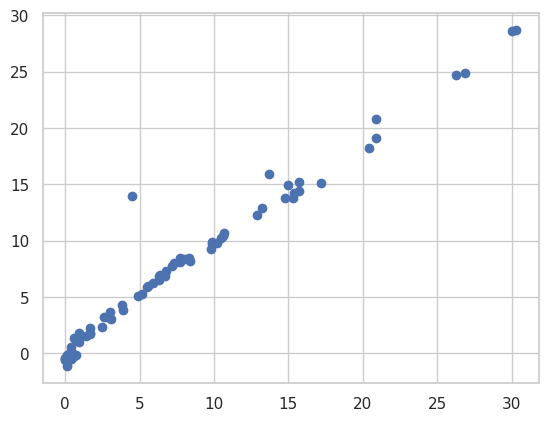

In [143]:
y_predlassocv = lassocrossval.predict(X_test_scaled)
plt.scatter(y_test, y_predlassocv) # to see error
mse = mean_squared_error(y_predlassocv, y_test)
mae = mean_absolute_error(y_predlassocv, y_test)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

#Accuracy:
score = r2_score(y_test, y_predlassocv)
adjscore = 1-(1-score)*(len(y)-1)/(len(y)-X.shape[1]-1)
#adj R2 = 1-(1-R^2)*(n-1)/(n-p-1)

print("Accuarcy using R2 Score:", score*100)
print("Accuaracy using adj R2:", adjscore*100)

RIDGECV:

In [144]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)

RidgeCV(cv=5)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RidgeCV was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RidgeCV was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RidgeCV was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RidgeCV was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RidgeCV was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RidgeCV was fitted without feature nam

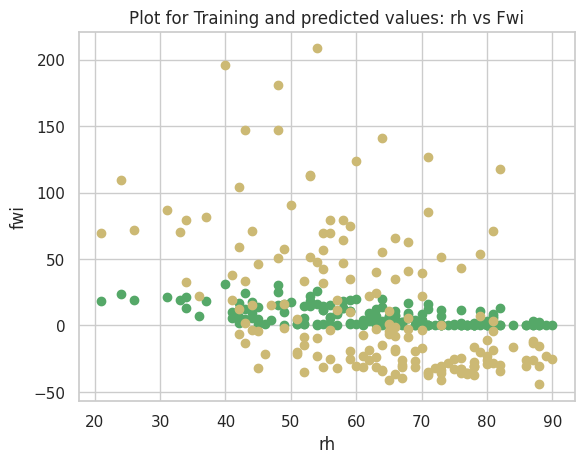

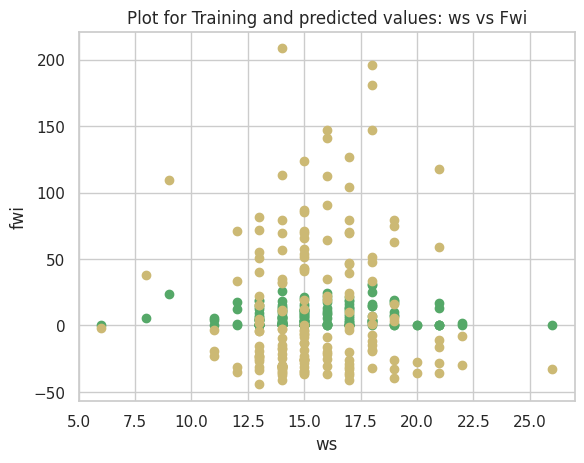

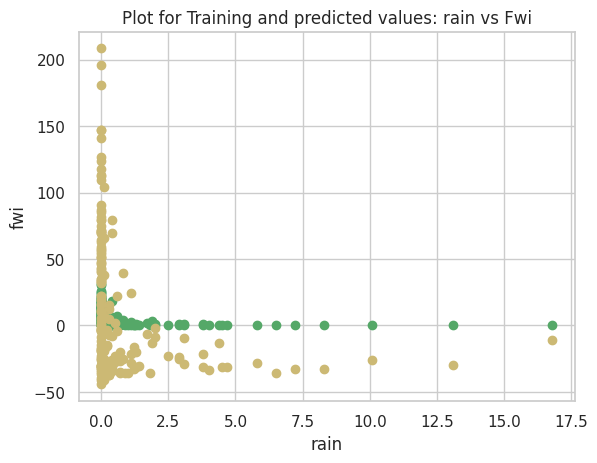

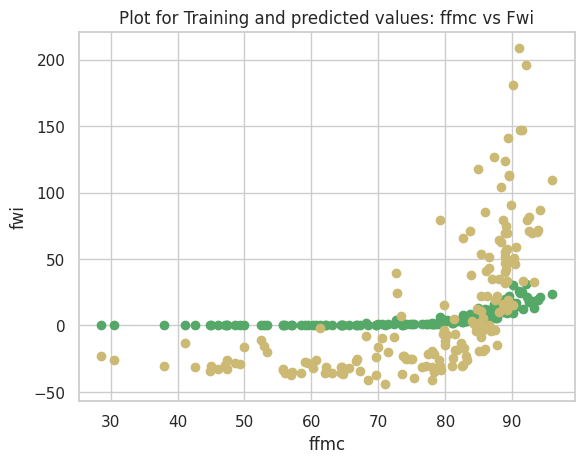

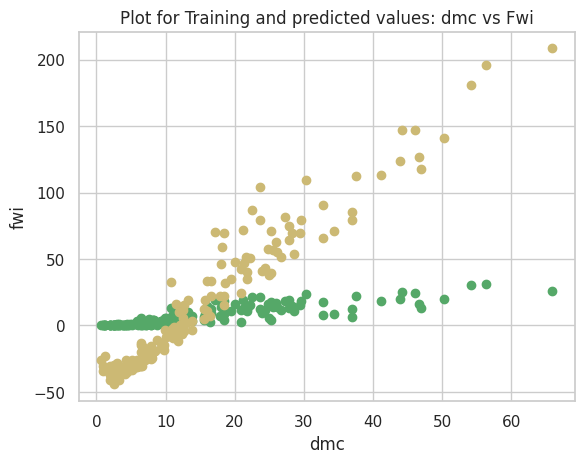

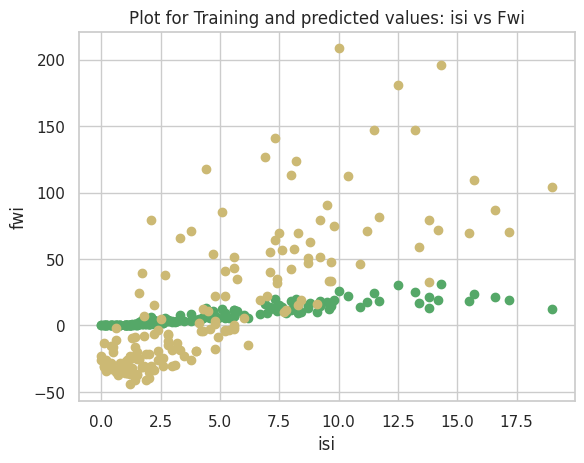

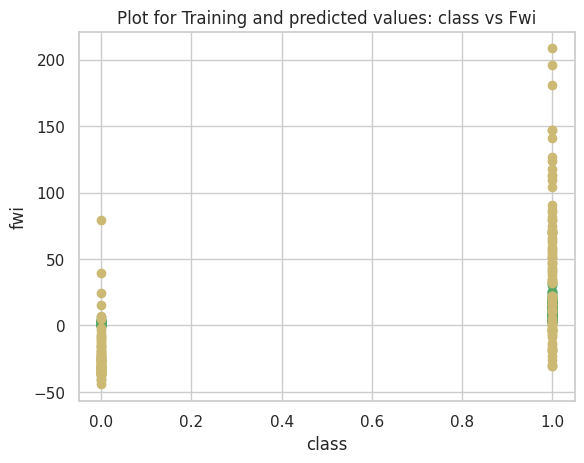

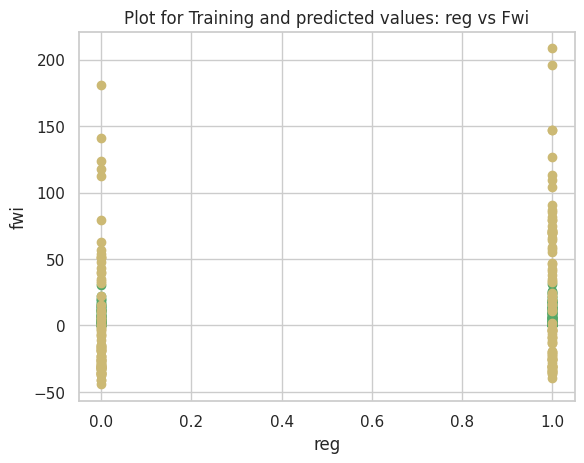

In [145]:
for i in range(1, X_train.shape[1]):
  plt.figure()  # Create a new figure for each feature
  plt.scatter(x=X_train.iloc[:, i],y=y_train, color='g')
  plt.scatter(x=X_train.iloc[:, i],y=ridgecv.predict(X_train), color='y')
  plt.xlabel(f"{X_train.columns[i]}")
  plt.ylabel("fwi")
  plt.title(f"Plot for Training and predicted values: {X_train.columns[i]} vs Fwi")
  plt.grid(True)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RidgeCV was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RidgeCV was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RidgeCV was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RidgeCV was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RidgeCV was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RidgeCV was fitted without feature nam

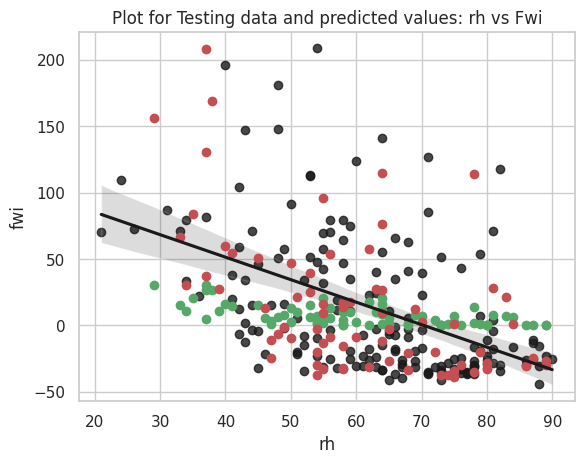

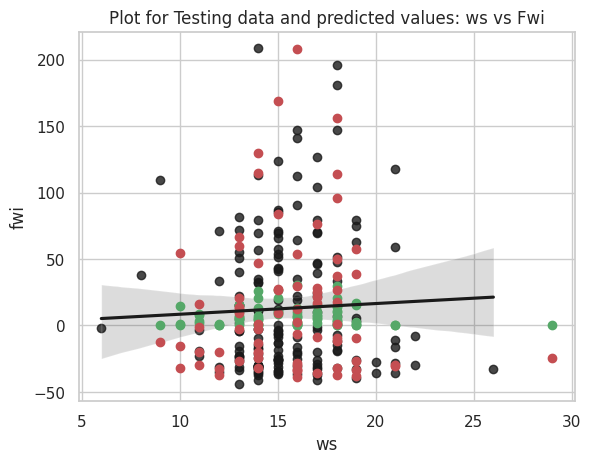

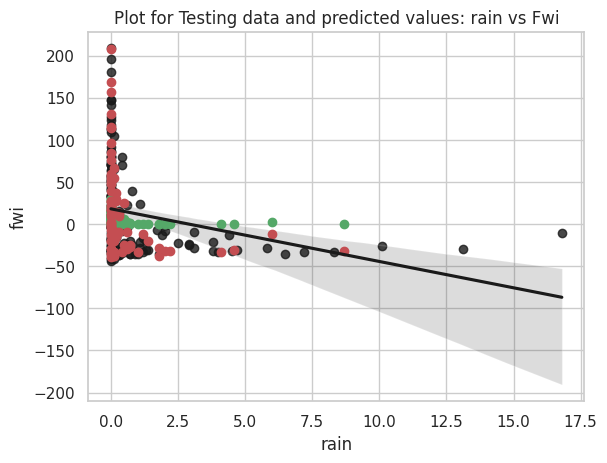

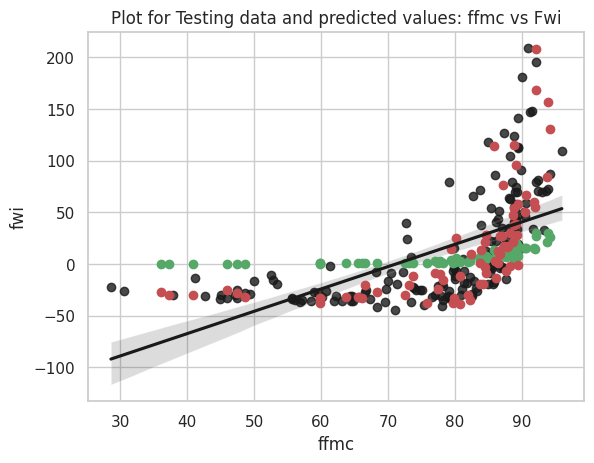

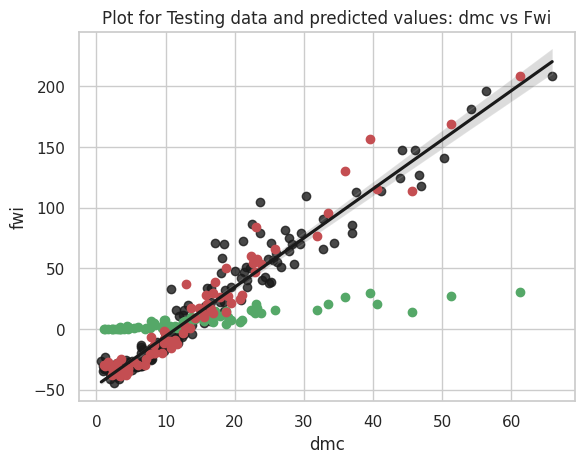

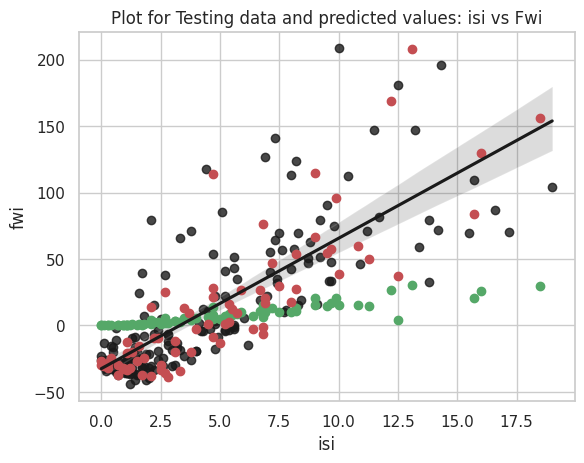

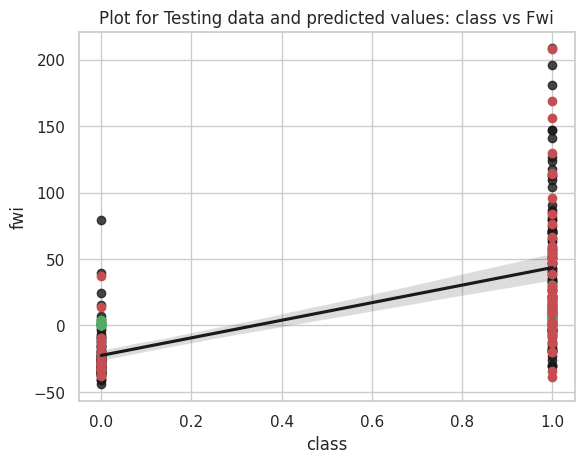

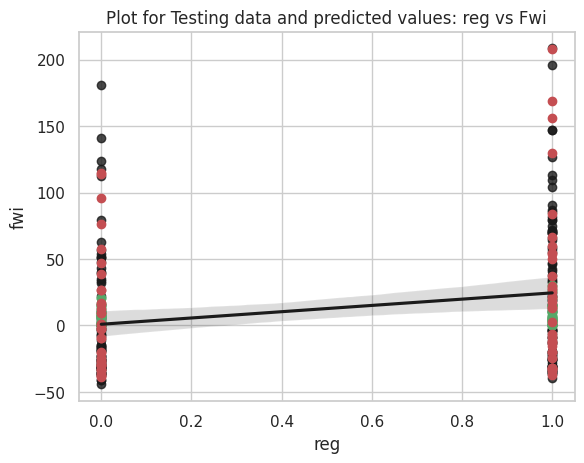

In [146]:
for i in range(1, X_test.shape[1]):
  plt.figure()  # Create a new figure for each feature
  sns.regplot(x=X_train.iloc[:, i],y=ridgecv.predict(X_train), color='k')
  plt.scatter(x=X_test.iloc[:, i],y=y_test, color='g')
  plt.scatter(x=X_test.iloc[:, i],y=ridgecv.predict(X_test), color='r')
  #sns.regplot(x=X_train.iloc[:, i],y=lassocrossval.predict(X_train), color='r')
  plt.xlabel(f"{X_test.columns[i]}")
  plt.ylabel("fwi")
  plt.title(f"Plot for Testing data and predicted values: {X_test.columns[i]} vs Fwi")
  plt.grid(True)

Mean Squared Error: 1.794647719075168
Mean Absolute Error: 0.7151462898656125
Accuarcy using R2 Score: 96.87762495884971
Accuaracy using adj R2: 96.72958131465722


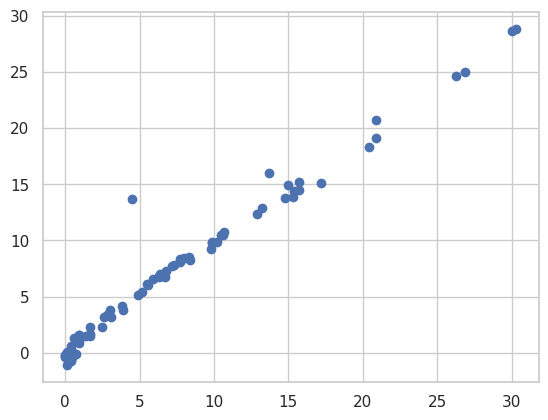

In [147]:
y_predridgecv=ridgecv.predict(X_test_scaled)
plt.scatter(y_test, y_predridgecv) # to see error
mse = mean_squared_error(y_predridgecv, y_test)
mae = mean_absolute_error(y_predridgecv, y_test)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

#Accuracy:
score = r2_score(y_test, y_predridgecv)
adjscore = 1-(1-score)*(len(y)-1)/(len(y)-X.shape[1]-1)
#adj R2 = 1-(1-R^2)*(n-1)/(n-p-1)

print("Accuarcy using R2 Score:", score*100)
print("Accuaracy using adj R2:", adjscore*100)

In [148]:
ridgecv.alpha_

1.0

In [149]:
ridgecv.alphas

(0.1, 1.0, 10.0)

In [150]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

ELASTIC NET:

In [151]:
from sklearn.linear_model import ElasticNetCV
elastnetcv = ElasticNetCV()
elastnetcv.fit(X_train_scaled,y_train)

ElasticNetCV()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but ElasticNetCV was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but ElasticNetCV was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but ElasticNetCV was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but ElasticNetCV was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but ElasticNetCV was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but ElasticNetCV 

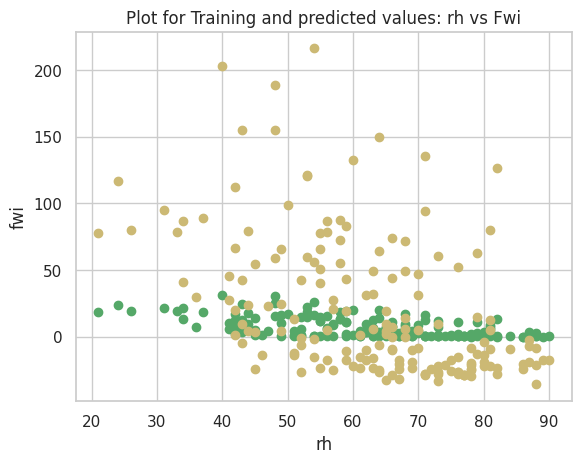

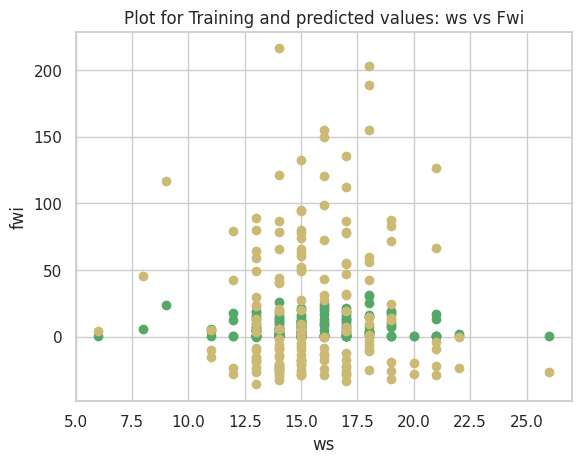

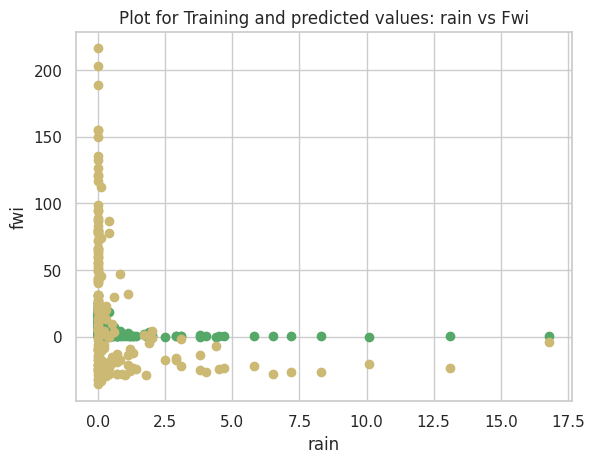

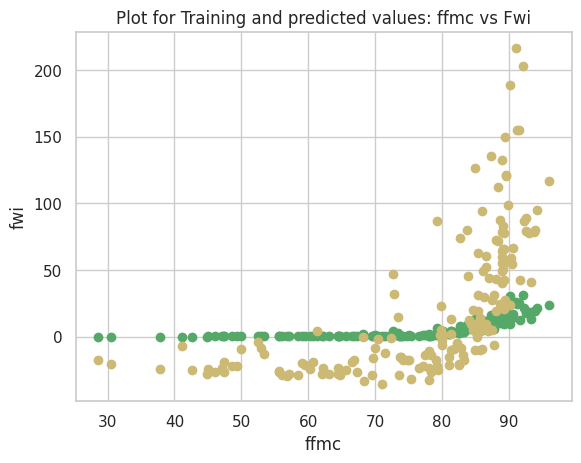

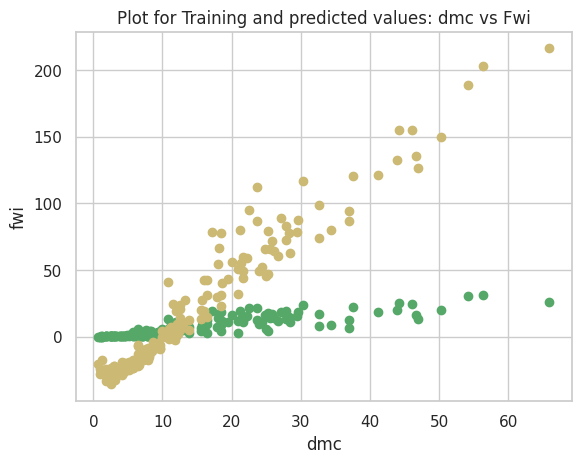

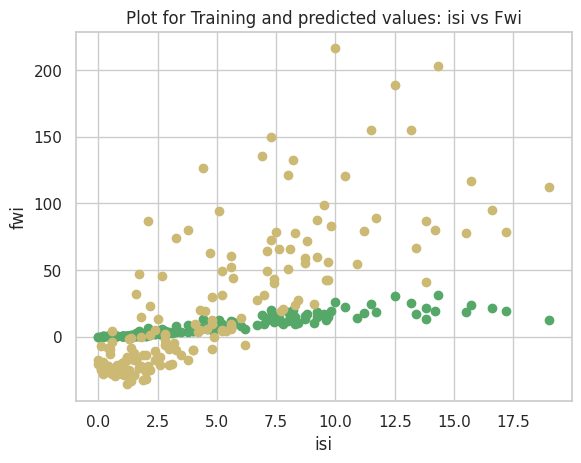

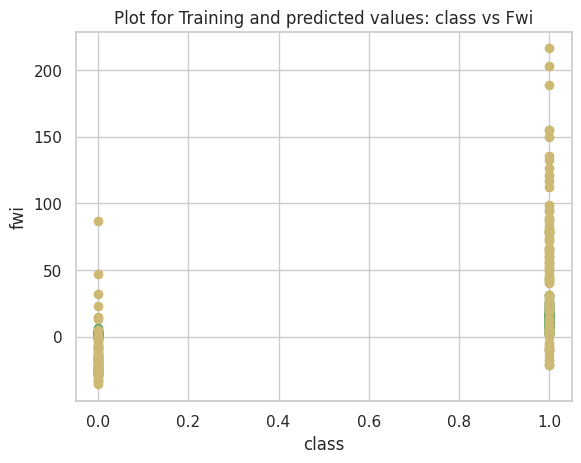

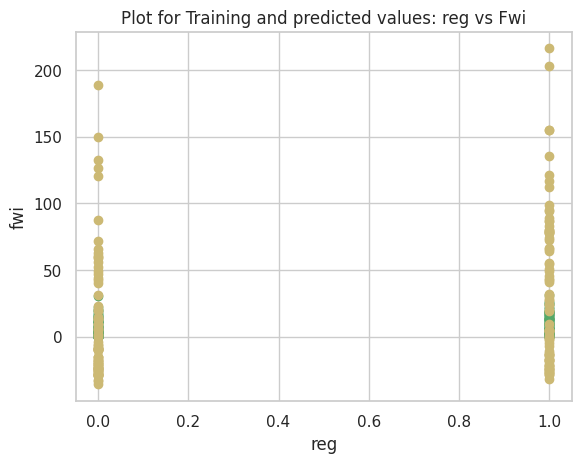

In [152]:
for i in range(1, X_train.shape[1]):
  plt.figure()  # Create a new figure for each feature
  plt.scatter(x=X_train.iloc[:, i],y=y_train, color='g')
  plt.scatter(x=X_train.iloc[:, i],y=elastnetcv.predict(X_train), color='y')
  plt.xlabel(f"{X_train.columns[i]}")
  plt.ylabel("fwi")
  plt.title(f"Plot for Training and predicted values: {X_train.columns[i]} vs Fwi")
  plt.grid(True)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but ElasticNetCV was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but ElasticNetCV was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but ElasticNetCV was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but ElasticNetCV was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but ElasticNetCV was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but ElasticNetCV 

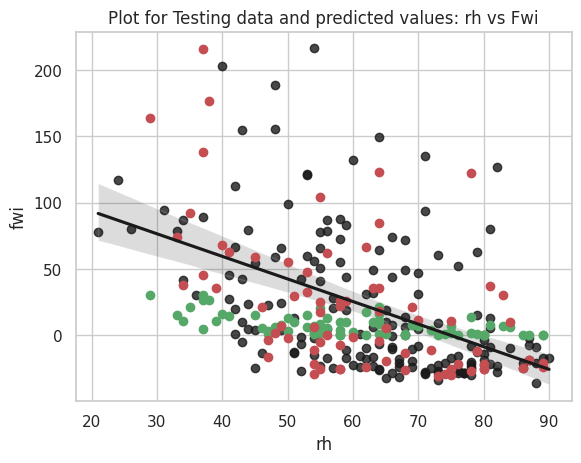

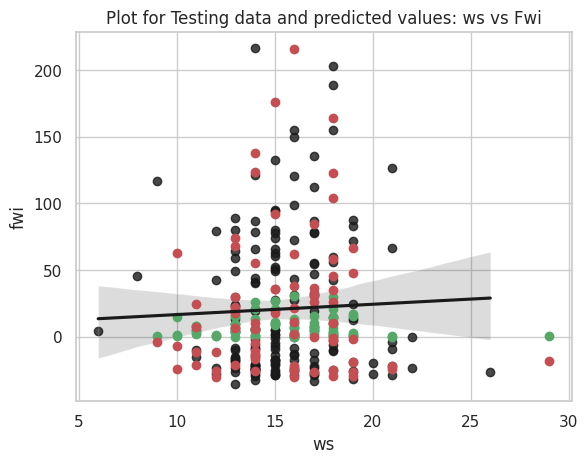

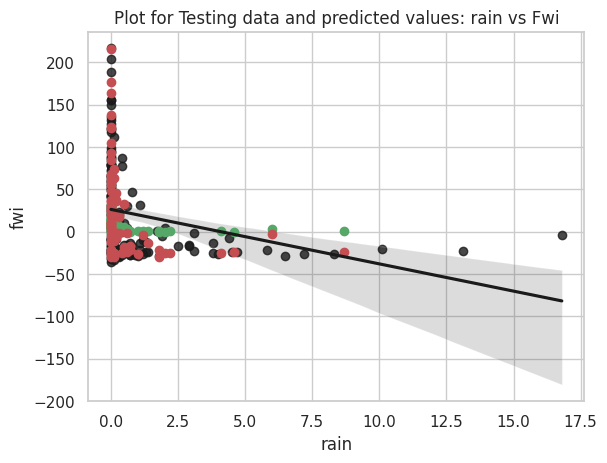

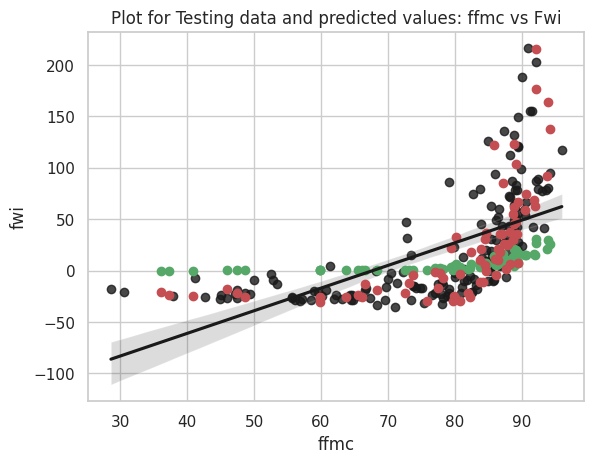

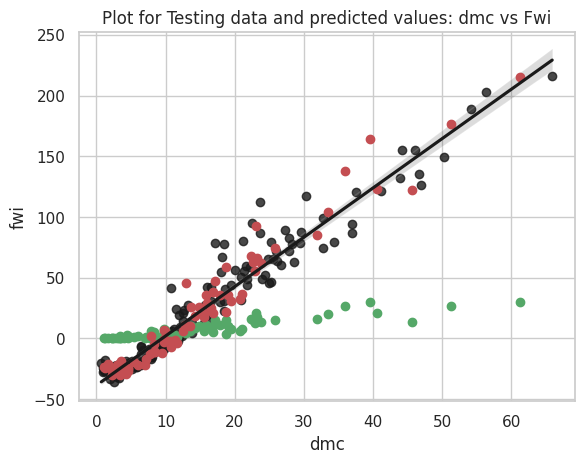

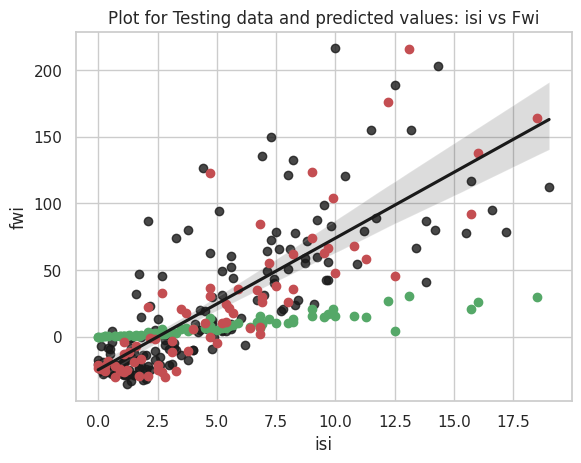

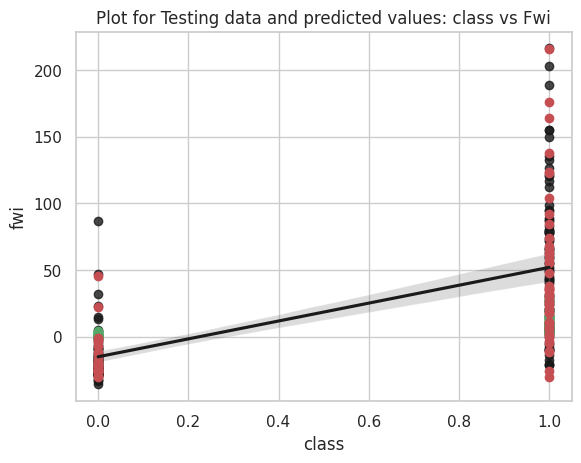

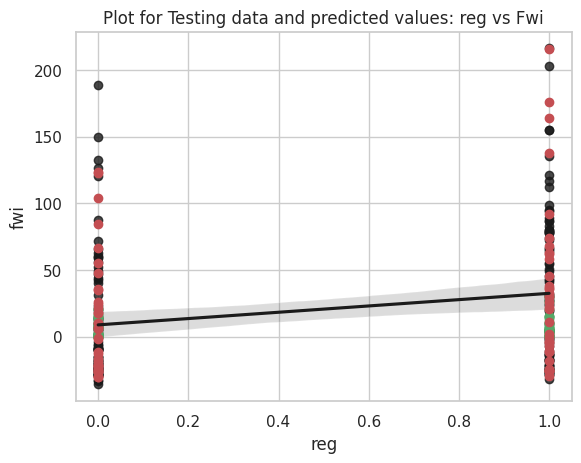

In [153]:
for i in range(1, X_test.shape[1]):
  plt.figure()  # Create a new figure for each feature
  sns.regplot(x=X_train.iloc[:, i],y=elastnetcv.predict(X_train), color='k')
  plt.scatter(x=X_test.iloc[:, i],y=y_test, color='g')
  plt.scatter(x=X_test.iloc[:, i],y=elastnetcv.predict(X_test), color='r')
  plt.xlabel(f"{X_test.columns[i]}")
  plt.ylabel("fwi")
  plt.title(f"Plot for Testing data and predicted values: {X_test.columns[i]} vs Fwi")
  plt.grid(True)

Mean Squared Error: 1.8248800315637064
Mean Absolute Error: 0.7331160095369591
Accuarcy using R2 Score: 96.82502599084772
Accuaracy using adj R2: 96.67448843006895


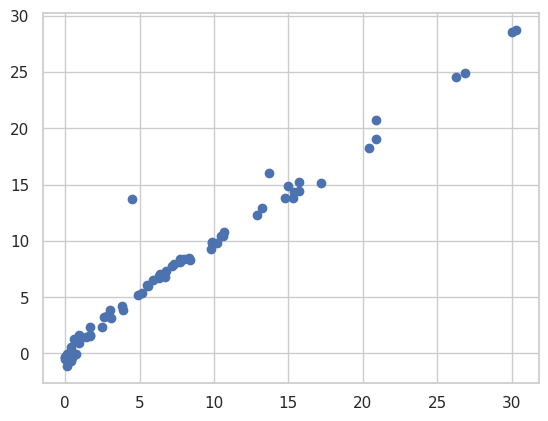

In [154]:
y_predelastnet=elastnetcv.predict(X_test_scaled)
plt.scatter(y_test, y_predelastnet) # to see error
mse = mean_squared_error(y_predelastnet, y_test)
mae = mean_absolute_error(y_predelastnet, y_test)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

#Accuracy:
score = r2_score(y_test, y_predelastnet)
adjscore = 1-(1-score)*(len(y)-1)/(len(y)-X.shape[1]-1)
#adj R2 = 1-(1-R^2)*(n-1)/(n-p-1)

print("Accuarcy using R2 Score:", score*100)
print("Accuaracy using adj R2:", adjscore*100)

In [155]:
elastnetcv.alpha_

0.014321202968189619

In [156]:
elastnetcv.alphas_

array([13.35600182, 12.455852  , 11.61636926, 10.83346485, 10.10332558,
        9.42239525,  8.78735735,  8.19511887,  7.64279529,  7.12769646,
        6.64731358,  6.19930689,  5.78149435,  5.39184099,  5.02844895,
        4.68954832,  4.37348846,  4.07872997,  3.80383722,  3.54747133,
        3.30838363,  3.08540965,  2.87746336,  2.68353196,  2.50267089,
        2.33399925,  2.17669551,  2.02999352,  1.89317875,  1.76558484,
        1.64659033,  1.53561565,  1.4321203 ,  1.33560018,  1.2455852 ,
        1.16163693,  1.08334649,  1.01033256,  0.94223952,  0.87873573,
        0.81951189,  0.76427953,  0.71276965,  0.66473136,  0.61993069,
        0.57814944,  0.5391841 ,  0.50284489,  0.46895483,  0.43734885,
        0.407873  ,  0.38038372,  0.35474713,  0.33083836,  0.30854096,
        0.28774634,  0.2683532 ,  0.25026709,  0.23339992,  0.21766955,
        0.20299935,  0.18931787,  0.17655848,  0.16465903,  0.15356157,
        0.14321203,  0.13356002,  0.12455852,  0.11616369,  0.10

In [157]:
elastnetcv.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': None,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': 0}